# Practical task: Modelling hotel cancellations

# Task

The aim of this task is to create a model or set of models which could be used to predict whether a customer is going to cancel a hotel booking.

To pass, you should include, at least:
* Some exploratory data analysis to justify features used in the model
* At least two different binary classification models
* Markdown boxes to compare the models and to explain your process and observations

For a full explanation of the marking criteria, see the documents in Integral.

<a id='intro'></a>
# Introduction

This data set contains information on 119,390 hotel bookings between July 2015 and August 2017. Each observation represents a hotel booking.

The data for two hotels is given. Both hotels are located in Portugal: the Resort Hotel is in the region of the Algarve and the City Hotel is in the city of Lisbon. A variety of categorical and numeric features are provided, including whether the book was cancelled.

Hotel management would find it useful to be able to predict whether a booking is likely to be cancelled.

<a id='import'></a>
# Importing libraries and data

<a id='libraries'></a>
## Importing the libraries

In [1]:
# pandas for data analysis
import pandas as pd

# seaborn for visualisation
import seaborn as sns
sns.set_context("talk")

# seaborn has some unhelpful warnings at the moment
import warnings
warnings.filterwarnings("ignore", module="seaborn")

# Import functions from sklearn for building the model, training-testing split, visualising the model and metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Function to draw the model
def plot_decision_tree(tree_model):
    fig, ax = plt.subplots(figsize=(20,8))
    plot_tree(tree_model,  
        filled=True, 
        impurity=False, 
        feature_names=input_features, 
        class_names=["No","Yes"], 
        proportion=True, 
        ax=ax)
    plt.show()

<a id='data'></a>
## Importing the data

In [2]:
hotel_data = pd.read_csv('../input/hotel-bookings/bookings_2025.csv')
hotel_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled
0,Resort Hotel,BB,Direct,342,0,0,2,0.0,0,0,0,0,3,0,0,0.00,0
1,Resort Hotel,BB,Direct,737,0,0,2,0.0,0,0,0,0,4,0,0,0.00,0
2,Resort Hotel,BB,Direct,7,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0
3,Resort Hotel,BB,Corporate,13,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0
4,Resort Hotel,BB,Online TA,14,0,2,2,0.0,0,0,0,0,0,0,1,98.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,23,2,5,2,0.0,0,0,0,0,0,0,0,96.14,0
119386,City Hotel,BB,Online TA,102,2,5,3,0.0,0,0,0,0,0,0,2,225.43,0
119387,City Hotel,BB,Online TA,34,2,5,2,0.0,0,0,0,0,0,0,4,157.71,0
119388,City Hotel,BB,Online TA,109,2,5,2,0.0,0,0,0,0,0,0,0,104.40,0


In [3]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   meal                            119390 non-null  object 
 2   market_segment                  119390 non-null  object 
 3   lead_time                       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   is_repeated_guest               119390 non-null  int64  
 10  previous_cancellations          119390 non-null  int64  
 11  previous_bookings_not_canceled  119390 non-null  int64  
 12  booking_changes 

<a id='pre'></a>
# Preparing the data and exploratory data analysis


In [4]:
# replace numbers with categories
hotel_data['cancelled'] = hotel_data['is_canceled'].replace({0: 'No', 1: 'Yes'})

# display to check
hotel_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled
0,Resort Hotel,BB,Direct,342,0,0,2,0.0,0,0,0,0,3,0,0,0.00,0,No
1,Resort Hotel,BB,Direct,737,0,0,2,0.0,0,0,0,0,4,0,0,0.00,0,No
2,Resort Hotel,BB,Direct,7,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0,No
3,Resort Hotel,BB,Corporate,13,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0,No
4,Resort Hotel,BB,Online TA,14,0,2,2,0.0,0,0,0,0,0,0,1,98.00,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,23,2,5,2,0.0,0,0,0,0,0,0,0,96.14,0,No
119386,City Hotel,BB,Online TA,102,2,5,3,0.0,0,0,0,0,0,0,2,225.43,0,No
119387,City Hotel,BB,Online TA,34,2,5,2,0.0,0,0,0,0,0,0,4,157.71,0,No
119388,City Hotel,BB,Online TA,109,2,5,2,0.0,0,0,0,0,0,0,0,104.40,0,No


Create a new Feature from the quantitative is_canceled to make a qualitative cancelled feature. This allows us to compare other quantitative features to it. 

In [5]:
hotel_data['cancelled'].value_counts()

No     75166
Yes    44224
Name: cancelled, dtype: int64

We see roughly 63% didn't cancel while the remaining 37% did cancel. This lets us know that there are more people who don't cancel than people who do. This is important for us to consider when we create binary classification models later on so we don't create models that give us 'don't cancel' all the time.

In [6]:
features=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
          'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
           'total_of_special_requests', 'adr']
          
# use group by to get the means of these for low and high income
hotel_data.groupby('cancelled')[features].mean().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr
cancelled,,,,,,,,,,,,
No,79.98,0.93,2.46,1.83,0.10,0.01,0.02,0.20,0.29,1.59,0.71,99.99
Yes,144.85,0.93,2.56,1.90,0.11,0.00,0.21,0.03,0.10,3.56,0.33,104.96


Here we are getting the mean values for each of feature for the values that get cancelled versus those that don't. This allows us to compare different features and which features might have the greatest effect on the result.

In [7]:
features_big_difference =['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
           'total_of_special_requests']
#These features are the ones that appear to make a difference with the means
hotel_data.groupby('cancelled')[features_big_difference].mean().round(2)

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests
cancelled,,,,,,
No,79.98,0.02,0.20,0.29,1.59,0.71
Yes,144.85,0.21,0.03,0.10,3.56,0.33


Here I have seperated the features with significant differences in their means.

And just for completeness here is the rest of the features:

In [8]:
features_small_difference=['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']

hotel_data.groupby('cancelled')[features_small_difference].mean().round(2)

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr
cancelled,,,,,,
No,0.93,2.46,1.83,0.10,0.01,99.99
Yes,0.93,2.56,1.90,0.11,0.00,104.96


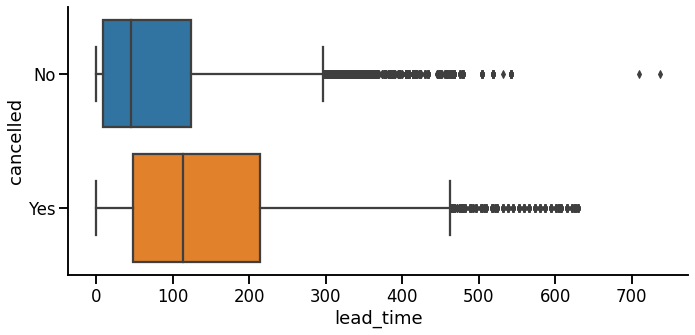

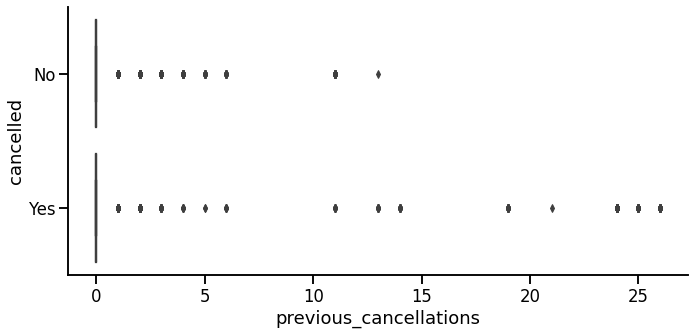

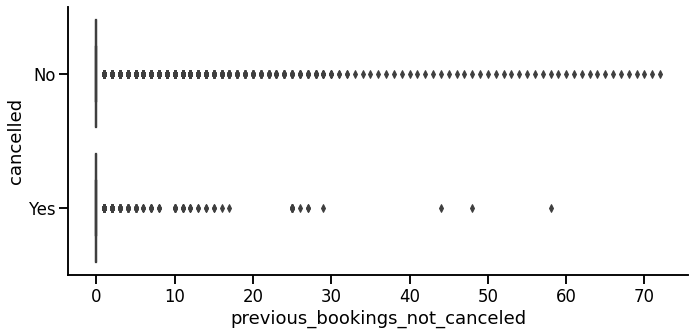

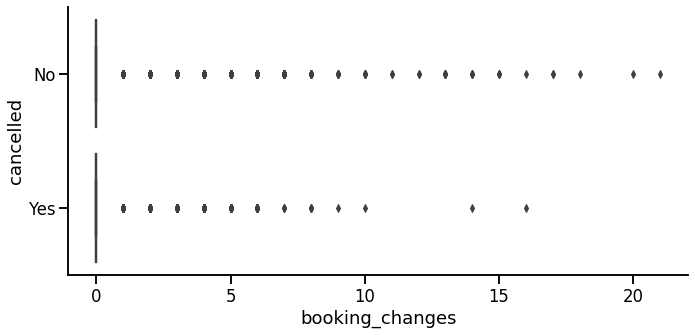

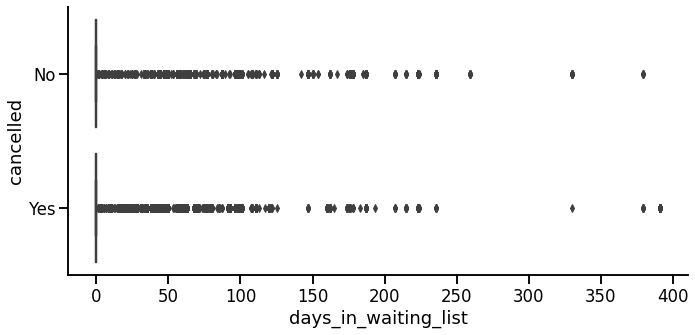

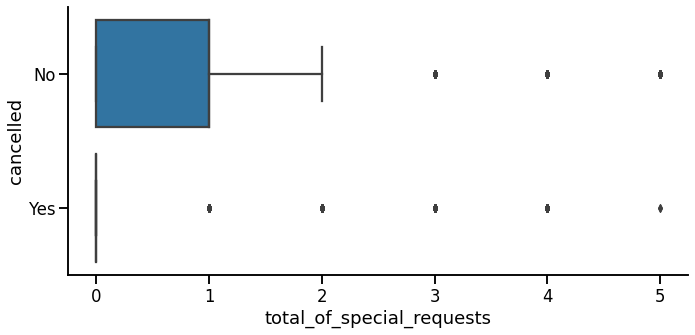

In [9]:
sns.catplot(data=hotel_data, kind='box',x='lead_time', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='box',x='previous_cancellations', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='box',x='previous_bookings_not_canceled', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='box',x='booking_changes', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='box',x='days_in_waiting_list', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='box',x='total_of_special_requests', y='cancelled',aspect=2);

For lead_time and total_of_special_requests we get a box plot that visually tells us something. We see that on average the median canceller has a higher lead time than the median non-canceller. The lower quartile and upper quartile of the cancelled are both also higher than their respective quartiles in the didn't cancel. However both the range and IQR are greater in the cancelled section. From this we can take away that if a customer has a longer lead_time they are more likely to cancel, this is perhaps because they have a longer time to change their plans while a someone with a shorter lead time has just booked their holiday and is less likely to change their mind or have second thoughts. However the greater range also suggests that there is a large range of lead times where people are more likely to cancel which makes sense as the lead times can just keep increasing for the people who book much earlier.

Looking at total_of_special_requests, we see that all the people who made any special requests and then cancelled are outliers while those that made up to 2 special requests aren't outliers in the didn't cancelled group which suggests people who made requests were unlikely to cancel maybe because once they made the effort to make a request and get their booking all ready they wouldn't want to cancel as it puts their effort to waste and inconveniences the hotel.

We can get a better idea of all these features and their distribution with a series of violin plots.

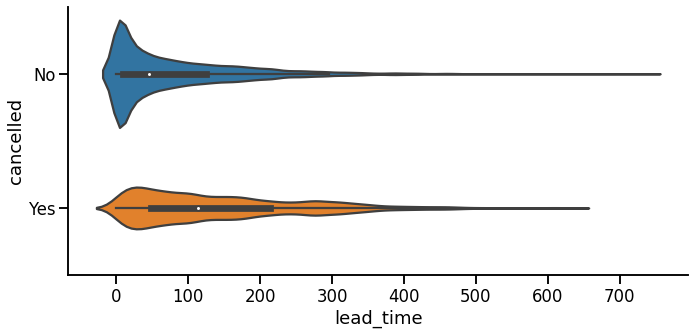

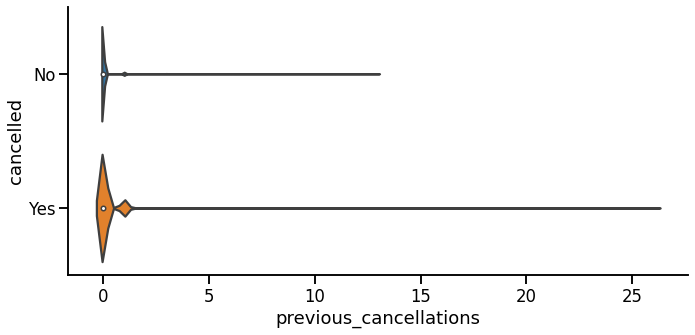

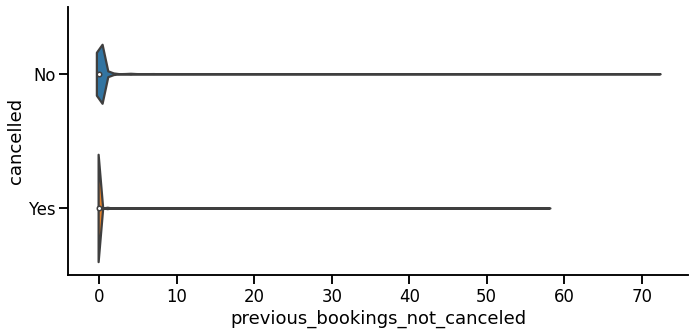

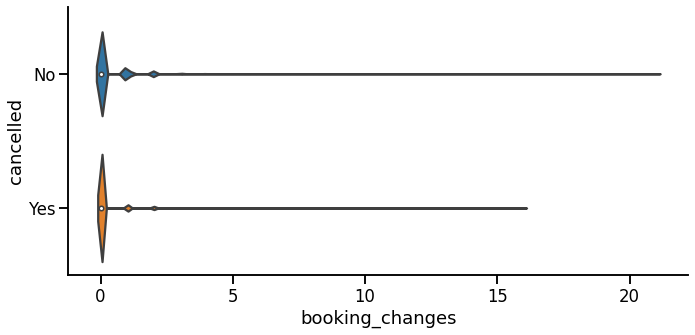

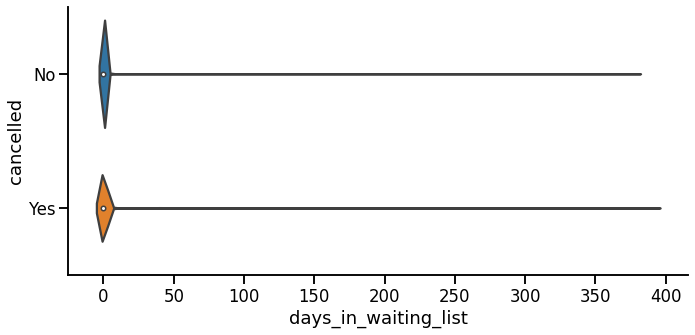

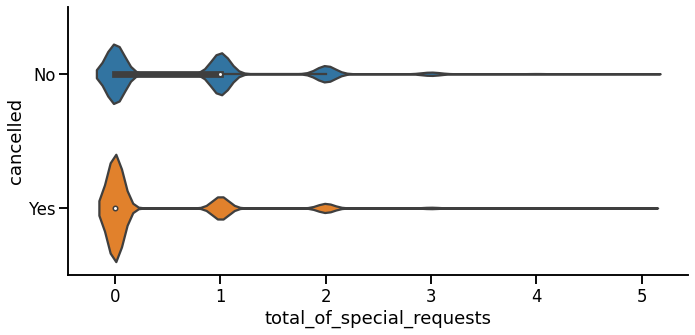

In [10]:
sns.catplot(data=hotel_data, kind='violin',x='lead_time', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='violin',x='previous_cancellations', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='violin',x='previous_bookings_not_canceled', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='violin',x='booking_changes', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='violin',x='days_in_waiting_list', y='cancelled',aspect=2);
sns.catplot(data=hotel_data, kind='violin',x='total_of_special_requests', y='cancelled',aspect=2);

Firstly, this emphasises our prior thesis that people who cancelled generally had a longer lead time which we can see by where the peaks of the violin plots are and we see that people who cancelled were much less likely to make special requests.

Due to many outliers for the other 4 it is still difficult to see the pattern so we should clean the data:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


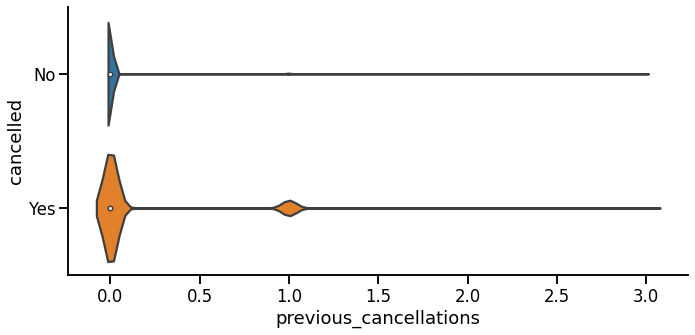

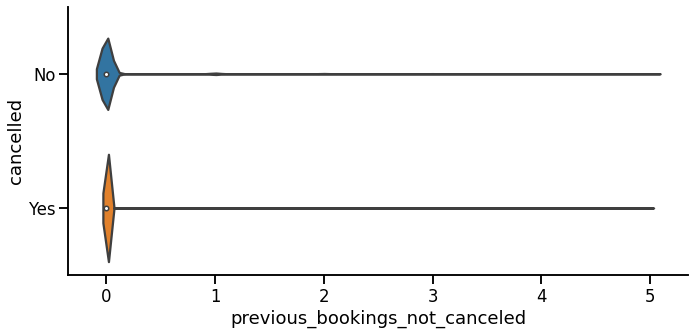

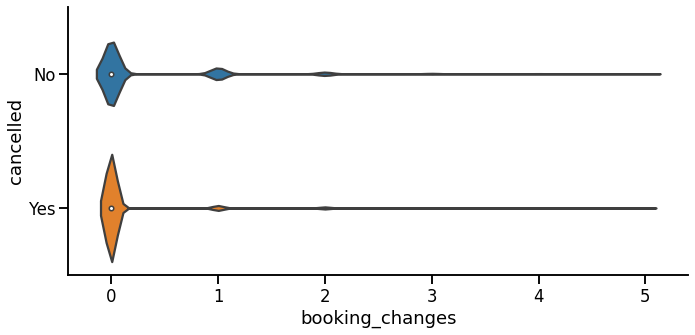

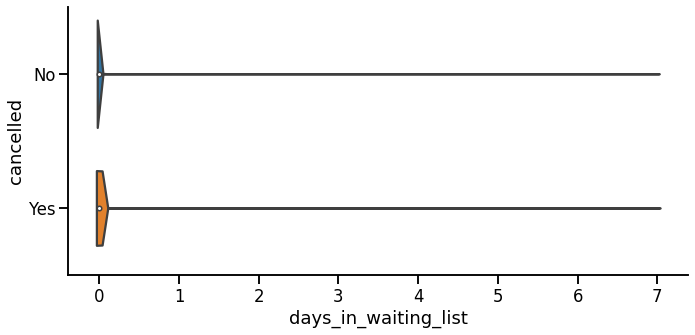

In [11]:
hotel_data_clean = (((hotel_data[hotel_data['previous_cancellations']<=3].copy())[hotel_data['previous_bookings_not_canceled']<=5].copy())\
                    [hotel_data['booking_changes']<=5].copy())[hotel_data['days_in_waiting_list']<=7] 
        #apologies for this janky implementaion it was the best I could think of without creating 5 new variables that would end up becoming redundant

sns.catplot(data=hotel_data_clean, kind='violin',x='previous_cancellations', y='cancelled',aspect=2);
sns.catplot(data=hotel_data_clean, kind='violin',x='previous_bookings_not_canceled', y='cancelled',aspect=2);
sns.catplot(data=hotel_data_clean, kind='violin',x='booking_changes', y='cancelled',aspect=2);
sns.catplot(data=hotel_data_clean, kind='violin',x='days_in_waiting_list', y='cancelled',aspect=2);

Now that we have cleaned the data it is a bit easier to see any distributions. 

We see that if they have cancelled before they are more likely to cancel again. This makes sense as if they have done something before they are more likely to do it again perhaps because people who have cancelled before are just more likely to due to their job (e.g. doctors) or other lifestyle factors causing them to make changes to their plans. Due to the a lot of people who cancel still not having cancelled before however this could make it a risky feature to build binary classification models out of.

For previous bookings not cancelled, the shape of the violin shows that if someone has come and hasn't cancelled before they are less likely to cancel however with both plots being centred around 0 it suggest that most bookings are first time bookings - perhaps something to look into in different slices.

For booking changes we see that people who make more changes are more likely to not cancel. This is perhaps is because if they have made the effort to ammend their booking they probably wouldn't cancel and put the effort to make changes to waste.

For days in waiting list the shape of the violin makes it seem more likely to cancel if there is a longer time on the waiting list however like previous bookings not cancelled this feature is mostly centred on 0 for both yes and no showing that for both catagories most people aren't on the waiting list/are for less than a day (unclear what 0 days on then waiting list means). 



The features lead_time, previous_cancellations, booking_changes and total_special_requests are the most likely to be important and we should look into these when we create our binary distribution.

**Catagorical features**

we have looked at the numerical/quantitative features but we should also look at how catagorical/qualitative features affect cancellations.

We will create proportional bar graphs and crosstabs to see which features have great disparities. We can then create slices of these and compare back with the numerical features that we found to have the greatest effect.

The catagorical features are: hotel, meal and market_segment

In [12]:
hotel_data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [13]:
hotel_data['meal'].value_counts()


BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [14]:
hotel_data['market_segment'].value_counts()


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

This shows us where how many people are in each group

In [15]:
pd.crosstab(hotel_data['cancelled'], hotel_data['hotel'], normalize='columns')

hotel,City Hotel,Resort Hotel
cancelled,,
No,0.58273,0.722366
Yes,0.41727,0.277634


In [16]:
pd.crosstab(hotel_data['cancelled'], hotel_data['meal'], normalize='columns')

meal,BB,FB,HB,SC,Undefined
cancelled,,,,,
No,0.626151,0.401003,0.655397,0.627606,0.755346
Yes,0.373849,0.598997,0.344603,0.372394,0.244654


In [17]:
pd.crosstab(hotel_data['cancelled'], hotel_data['market_segment'], normalize='columns')

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
cancelled,,,,,,,,
No,0.780591,0.869448,0.812653,0.846581,0.38938,0.65684,0.632789,0.0
Yes,0.219409,0.130552,0.187347,0.153419,0.61062,0.34316,0.367211,1.0


We see that more people in the city hotel cancel than in the resort with 40% vs 30% suggesting they get a slightly different customers.

In terms of meal types we see that BB,HB amd SC are all about 60:40, FB is 40:60 at the most likely to cancel but also the least amount of people (most likely to be because full board is the most expensive and doesn't allow you to experience the place that you are staying) and undefined at 75:25 at the least likely to cancel and still a sizeable 1000 people.

Market segment shows that all segments are more likely to not cancel apart from groups which are more likely to cancel possibly because in groups there is more that can go wrong/change as there are more people to comply with. Complementary are the least likely to cancel, probably because it was free for them.

Lets create the bar charts so this is all easier to see.

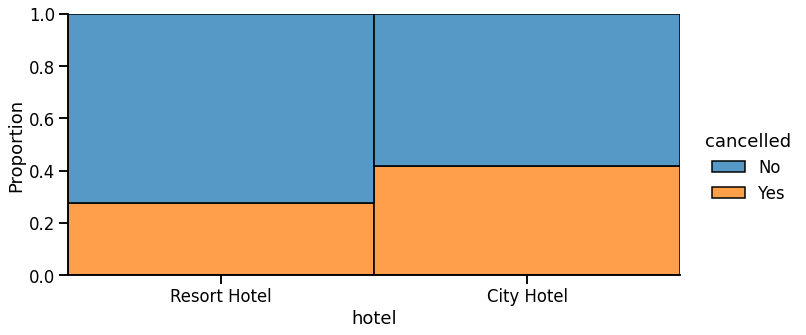

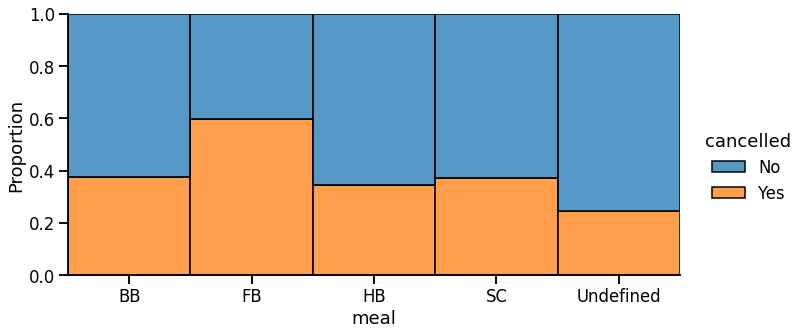

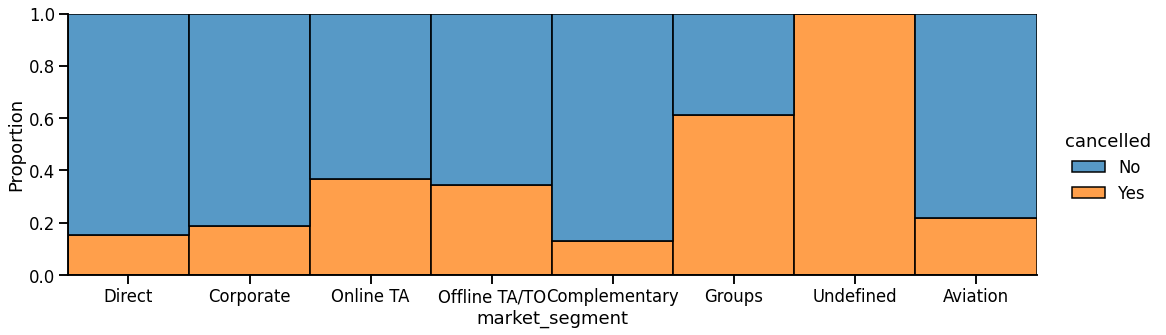

In [18]:
sns.displot(data=hotel_data, x='hotel', hue='cancelled', stat='proportion', multiple='fill',aspect=2);
sns.displot(data=hotel_data, x='meal', hue='cancelled', stat='proportion', multiple='fill',aspect=2);
sns.displot(data=hotel_data, x='market_segment', hue='cancelled', stat='proportion', multiple='fill',aspect=3);

These graphs make the above notions easier to visualise and think about. In the market segment chart we should discount undefined as there is only 2 of those and they are likely anomolies and errors in the system.

Now that we have looked at all features we should create slices of the data to focus on what impacts the different groups. 

Things I want to test:
* What affects cancellations in the different hotels, are they the same or different
* In market segment we see the biggest differences between different segments, so it will be interesting to see what causes these differences.
* In the groups (market segment) slice specifically (where cancellation rate is the highest) I want to see how group size (adults+children+babies) affects the results

In [19]:
city_data = hotel_data[(hotel_data['hotel'] == 'City Hotel')].copy()

# display to check
city_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled
40060,City Hotel,HB,Offline TA/TO,6,0,2,1,0.0,0,0,0,0,0,0,0,0.00,0,No
40061,City Hotel,BB,Online TA,88,0,4,2,0.0,0,0,0,0,0,0,1,76.50,1,Yes
40062,City Hotel,BB,Online TA,65,0,4,1,0.0,0,0,0,0,0,0,1,68.00,1,Yes
40063,City Hotel,BB,Online TA,92,2,4,2,0.0,0,0,0,0,0,0,2,76.50,1,Yes
40064,City Hotel,BB,Online TA,100,0,2,2,0.0,0,0,0,0,0,0,1,76.50,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,23,2,5,2,0.0,0,0,0,0,0,0,0,96.14,0,No
119386,City Hotel,BB,Online TA,102,2,5,3,0.0,0,0,0,0,0,0,2,225.43,0,No
119387,City Hotel,BB,Online TA,34,2,5,2,0.0,0,0,0,0,0,0,4,157.71,0,No
119388,City Hotel,BB,Online TA,109,2,5,2,0.0,0,0,0,0,0,0,0,104.40,0,No


In [20]:
resort_data = hotel_data[(hotel_data['hotel'] == 'Resort Hotel')].copy()

# display to check
resort_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled
0,Resort Hotel,BB,Direct,342,0,0,2,0.0,0,0,0,0,3,0,0,0.00,0,No
1,Resort Hotel,BB,Direct,737,0,0,2,0.0,0,0,0,0,4,0,0,0.00,0,No
2,Resort Hotel,BB,Direct,7,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0,No
3,Resort Hotel,BB,Corporate,13,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0,No
4,Resort Hotel,BB,Online TA,14,0,2,2,0.0,0,0,0,0,0,0,1,98.00,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,BB,Offline TA/TO,212,2,8,2,1.0,0,0,0,0,1,0,0,89.75,0,No
40056,Resort Hotel,BB,Direct,169,2,9,2,0.0,0,0,0,0,0,0,1,202.27,0,No
40057,Resort Hotel,BB,Direct,204,4,10,2,0.0,0,0,0,0,0,0,3,153.57,0,No
40058,Resort Hotel,HB,Offline TA/TO,211,4,10,2,0.0,0,0,0,0,0,0,1,112.80,0,No


In [21]:
city_data.groupby('cancelled')[features].mean().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr
cancelled,,,,,,,,,,,,
No,80.70,0.80,2.12,1.83,0.10,0.01,0.02,0.21,0.26,2.15,0.74,105.75
Yes,150.28,0.79,2.27,1.88,0.08,0.00,0.16,0.03,0.08,4.73,0.28,104.69


In [22]:
resort_data.groupby('cancelled')[features].mean().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr
cancelled,,,,,,,,,,,,
No,78.84,1.13,3.01,1.83,0.11,0.02,0.01,0.19,0.34,0.69,0.67,90.79
Yes,128.68,1.34,3.44,1.96,0.19,0.01,0.35,0.02,0.15,0.09,0.49,105.79


In [23]:
city_data.groupby('cancelled')[features_big_difference].mean().round(2)

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests
cancelled,,,,,,
No,80.70,0.02,0.21,0.26,2.15,0.74
Yes,150.28,0.16,0.03,0.08,4.73,0.28


In [24]:
resort_data.groupby('cancelled')[features_big_difference].mean().round(2)

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests
cancelled,,,,,,
No,78.84,0.01,0.19,0.34,0.69,0.67
Yes,128.68,0.35,0.02,0.15,0.09,0.49


We can go back to our violin plots to make it easier compare this data and as the general trend of our data which we see above is similar to our entire data set I will use the features that I found to be the most significant:

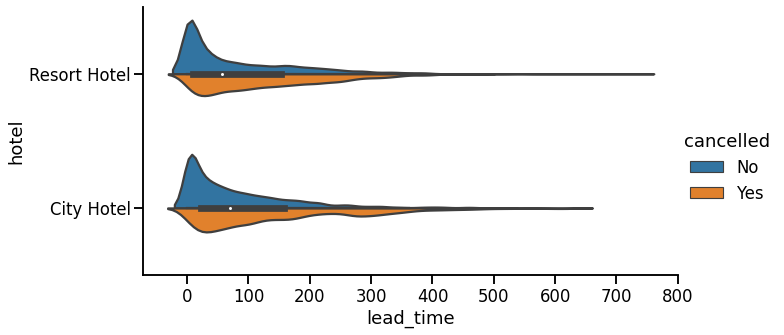

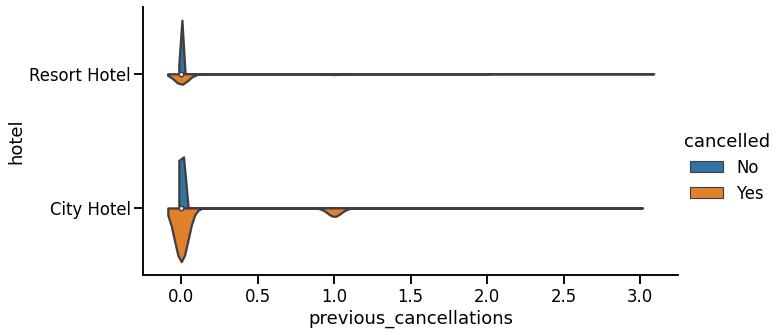

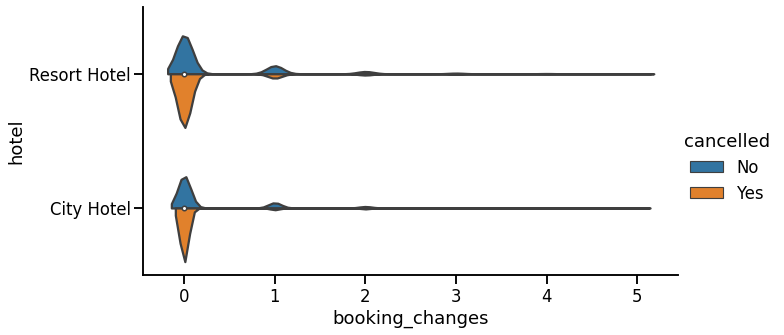

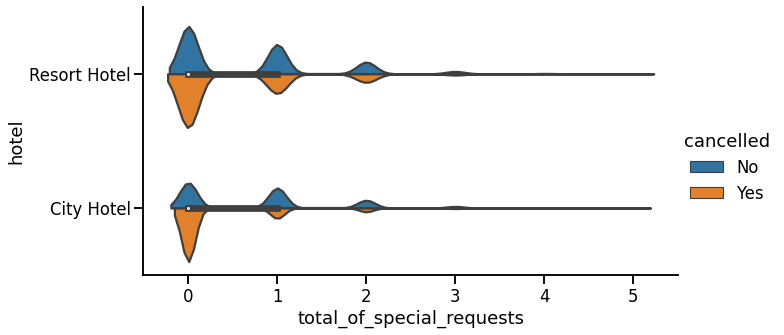

In [25]:
sns.catplot(data=hotel_data_clean, kind='violin',x='lead_time', y='hotel',hue='cancelled',split=True,aspect=2);
sns.catplot(data=hotel_data_clean, kind='violin',x='previous_cancellations', y='hotel',hue='cancelled',split=True,aspect=2);
sns.catplot(data=hotel_data_clean, kind='violin',x='booking_changes', y='hotel',hue='cancelled',split=True,aspect=2);
sns.catplot(data=hotel_data_clean, kind='violin',x='total_of_special_requests', y='hotel',hue='cancelled',split=True,aspect=2);

Across both hotels, lead_time seems to have the same affect with the city hotel having slightly longer lead times among those that cancelled however, this feature would still be a solid choice for binary classifications for both hotel types.

Previous cancellations show us that people who book the resort appear to have not cancelled before whether they end up cancelling or not. Perhaps this resort hotel is a new hotel so people who have cancelled before haven't had the time to make another booking for say the next year. Whereas in the city hotel, we see that **none** of the people who don't cancel have cancelled before and only the cancelled bookings had people who cancelled before. This is an interesting difference between the hotels. Perhaps the city hotel has been open for longer than the resort allowing for this to happen. A different reason of this difference may be down to the type of hotel they are and the kind of market surrounding them. By this I mean that with the resort hotels, especially in portugal (and the Algarve where this hotel is) it is very sunny and there are many resort hotels (I have been - the Algarve is nice) this means that there will be lots of competition between hotels so if you cancel at one hotel when you go back to book a hotel you might choose a different hotel. Whereas in the city there is a lot more buisness and less hotels meaning less competiton and a different crowd. So lets say a work trip got cancelled, when it gets booked again they are more likely to just choose the same hotel and if the subsequent trip got cancelled then that will lead to there being previous cancellations. This feature may be bad for binary classification however as they are both centred around 0.

In terms of booking changes, people who make a change and then cancel are more common at the resort hotel however the trend that people who make changes are less likely to cancel still holds and most people still not making any changes is across both hotels.

In the city hotel people who make any special requests are less likely to cancel whereas people who don't make special requests are more likely to cancel. Whereas in the resort hotel there is little difference. This difference may be due to people in the city or going to the city are often more busy so if they have made a request for their hotel they won't want to put that to waste whereas people who go to the resorts are fine switching or cancelling. This is perhaps a good feature for binary classification for the city slice specifically.

Now we have gotten insights into the hotel types lets look into **market segment**. To make for easier comparisons, I am going to make 3 slices combining the online and offline travel agents, the direct and the groups. These are good slices as these 4 types of market segment make up the top 4 types of booking with number 5 (corporate) having a big drop down of numbers from groups. 

direct had the lowest cancellations out of the 3 followed by TA with groups having a much higher rate of cancellations.

In [26]:
TA_data = hotel_data[(hotel_data['market_segment'] == 'Offline TA/TO')+(hotel_data['market_segment'] == 'Online TA')].copy()

# display to check
TA_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled
4,Resort Hotel,BB,Online TA,14,0,2,2,0.0,0,0,0,0,0,0,1,98.00,0,No
5,Resort Hotel,BB,Online TA,14,0,2,2,0.0,0,0,0,0,0,0,1,98.00,0,No
8,Resort Hotel,BB,Online TA,85,0,3,2,0.0,0,0,0,0,0,0,1,82.00,1,Yes
9,Resort Hotel,HB,Offline TA/TO,75,0,3,2,0.0,0,0,0,0,0,0,0,105.50,1,Yes
10,Resort Hotel,BB,Online TA,23,0,4,2,0.0,0,0,0,0,0,0,0,123.00,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,23,2,5,2,0.0,0,0,0,0,0,0,0,96.14,0,No
119386,City Hotel,BB,Online TA,102,2,5,3,0.0,0,0,0,0,0,0,2,225.43,0,No
119387,City Hotel,BB,Online TA,34,2,5,2,0.0,0,0,0,0,0,0,4,157.71,0,No
119388,City Hotel,BB,Online TA,109,2,5,2,0.0,0,0,0,0,0,0,0,104.40,0,No


In [27]:
direct_data = hotel_data[(hotel_data['market_segment'] == 'Direct')].copy()

# display to check
direct_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled
0,Resort Hotel,BB,Direct,342,0,0,2,0.0,0,0,0,0,3,0,0,0.00,0,No
1,Resort Hotel,BB,Direct,737,0,0,2,0.0,0,0,0,0,4,0,0,0.00,0,No
2,Resort Hotel,BB,Direct,7,0,1,1,0.0,0,0,0,0,0,0,0,75.00,0,No
6,Resort Hotel,BB,Direct,0,0,2,2,0.0,0,0,0,0,0,0,0,107.00,0,No
7,Resort Hotel,FB,Direct,9,0,2,2,0.0,0,0,0,0,0,0,1,103.00,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119358,City Hotel,BB,Direct,135,1,4,2,0.0,0,0,0,0,0,0,1,143.10,0,No
119365,City Hotel,BB,Direct,54,3,5,1,0.0,0,0,0,0,0,0,1,266.75,0,No
119368,City Hotel,BB,Direct,261,1,4,2,0.0,0,0,0,0,0,0,0,99.00,0,No
119369,City Hotel,BB,Direct,207,3,7,2,0.0,0,0,0,0,0,0,2,96.25,0,No


In [28]:
group_data = hotel_data[(hotel_data['market_segment'] == 'Groups')].copy()

# display to check
group_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled
413,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No
414,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No
415,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No
416,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No
417,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119274,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,2,0,0,104.0,0,No
119275,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,1,0,0,104.0,0,No
119276,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,1,0,0,104.0,0,No
119277,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,1,0,0,104.0,0,No


In [29]:
TA_data.groupby('cancelled')[features].mean().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr
cancelled,,,,,,,,,,,,
No,84.57,1.01,2.61,1.90,0.11,0.01,0.01,0.03,0.23,0.98,0.85,104.49
Yes,123.57,1.01,2.76,1.94,0.15,0.00,0.12,0.00,0.12,3.38,0.46,114.91


In [30]:
direct_data.groupby('cancelled')[features].mean().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr
cancelled,,,,,,,,,,,,
No,45.96,0.82,2.25,1.86,0.17,0.02,0.01,0.15,0.42,0.05,0.60,113.88
Yes,71.39,1.03,2.88,1.99,0.21,0.02,0.09,0.04,0.25,0.01,0.44,124.11


In [31]:
group_data.groupby('cancelled')[features].mean().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr
cancelled,,,,,,,,,,,,
No,139.06,0.87,2.36,1.70,0.01,0.0,0.00,0.01,0.50,8.78,0.22,77.12
Yes,217.53,0.74,2.10,1.86,0.00,0.0,0.45,0.02,0.03,4.89,0.00,80.98


By looking at this data we can see some general trends. Among these new slices the data that had little effect before still has little effect.

Lead time continues to be a consistent show of the likelihood of cancellation and would be good for binary classification models.

Previous cancellations is also a fairly consistent sign with a much greater effect in the groups data. Perhaps, this is due to more people being in group bookings if they don't work out once there is enough people that they would want to try again and then if they cancel before they are more likely to cancel again lilely intesnified by being in a group and the types of people in that group. Potentially a good feature for use in binary classification especially for the groups slice.

booking changes continues the trend of previous cancellations where the the normal trend is there in the first two slices but there is a much greater effect in the group data - again potentially a good feature for use in binary classification for that slice. This effect might be because if there are more people and they change their booking they are more invested in the booking and are sure the whole groups wants to do this plan making them less likely to cancel and because it is a group, there are more people so the investment is just intensified.

Days in waiting list shows a bizarre result - for TAs if they have to wait longer they are more likely to cancel which makes sense as they are more likely to be fed up. For direct the waiting times are both quite small however it becomes more likely to not cancel with a longer wait time however as these values are so miniscule this could be perhaps because of an anomaly skewing the average. Where it gets really strange is with the groups slice where both sections (yes and no) have quite large averages (maybe people in groups have to wait longer as there is less availability for them) but not only that, people who didn't cancel ended up having a longer wait time on average by a sizeable amount (nearly double). Reasons for this could be anomolies skewing the averages ,however I doubt that considering both values are quite high, so perhaps for groups making them wait longer can cause them to be more invested in their booking making them less likely to cancel. This feature would be quite good for a binary classification model for TAs and especially groups.

Special requests shows the same trend that those who make special requests are more likely to stay. However, interestingly we see that TAs are more likely to make requests than direct and they are more likely to make requests than groups. This somewhat lines up with the other data as TAs and direct who are less likely to cancel make more requests and groups who are more likely to cancel make less requests, this shows that the two pieces of data show  a correlation when the variable that affects them both (likelihood to cancel) changes, however the two variables probably don't have a causual relationship. As this data is small it might not make for a good feature to use in a binary classification model.

From what we have seen the group slice looks very interesting with many big differences in its features so lets look into it closer analysing the features that have a big difference between the averages and also take a look at how group sizes affects things.

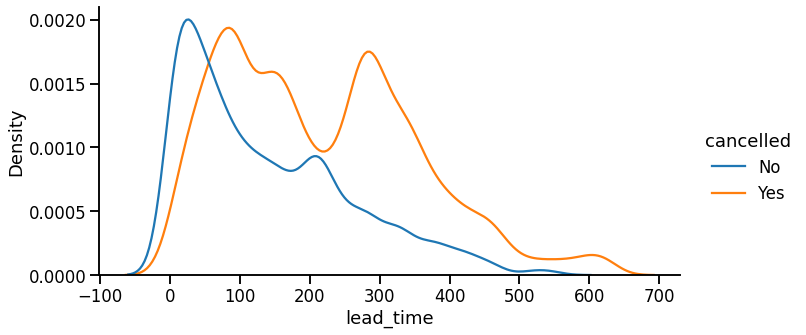

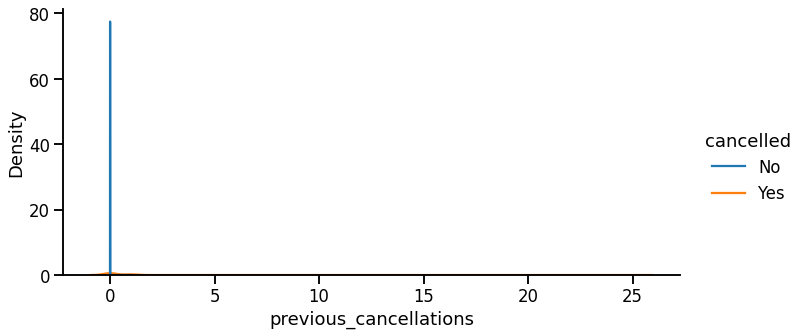

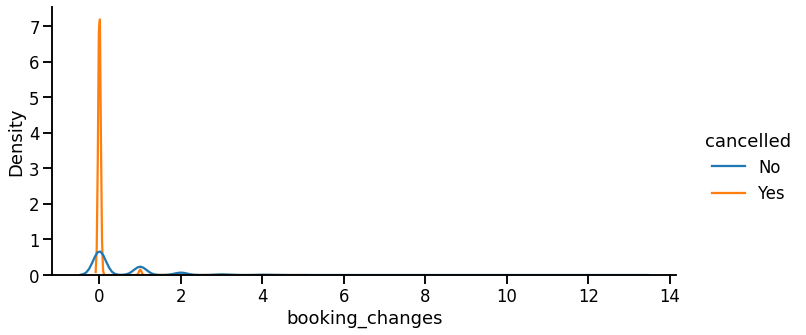

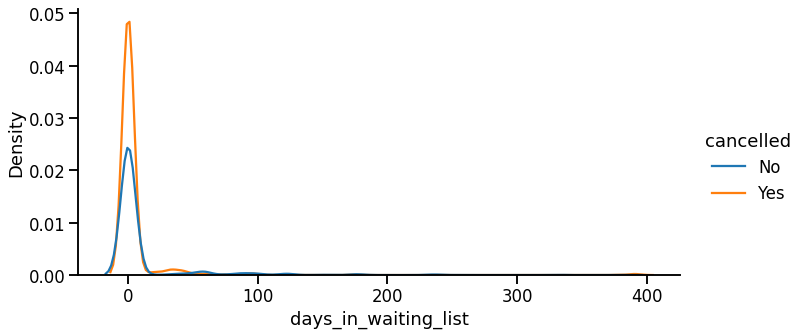

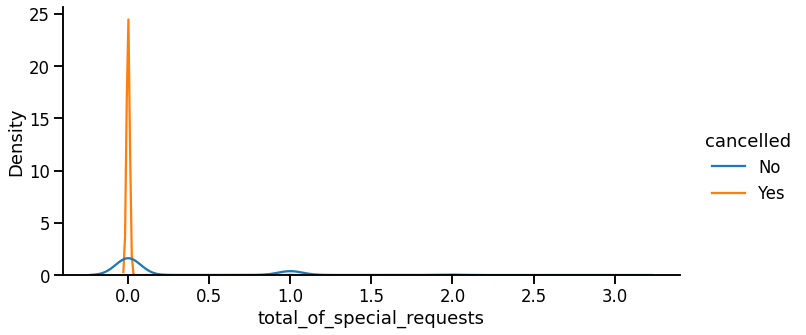

In [32]:
sns.displot(data=group_data, kind='kde', x='lead_time', hue='cancelled', aspect=2);
sns.displot(data=group_data, kind='kde', x='previous_cancellations', hue='cancelled', aspect=2);
sns.displot(data=group_data, kind='kde', x='booking_changes', hue='cancelled', aspect=2);
sns.displot(data=group_data, kind='kde', x='days_in_waiting_list', hue='cancelled', aspect=2);
sns.displot(data=group_data, kind='kde', x='total_of_special_requests', hue='cancelled', aspect=2);

Looking at these graphs, lead time may be the only one defenitely adequate for a binary classification.

It is unclear about previous cancellations - perhaps experimant with it in binary classifications.

Booking changes continues to show no changes means more likely to cancel, possibility of not working for binary classification - again try it out.

days in waiting list and special requests both show a concentration of cancellations around 0 and also show that they might work with binary classification.

It looks like the large numbers in days in waiting list was definitely due to anomalies.

In [33]:
group_data['people'] = group_data['adults'] + group_data['children'] + group_data['babies']

group_data

,hotel,meal,market_segment,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,adr,is_canceled,cancelled,people
413,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No,2.0
414,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No,2.0
415,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No,2.0
416,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No,2.0
417,Resort Hotel,FB,Groups,57,0,2,2,0.0,0,0,0,0,0,0,0,107.0,0,No,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119274,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,2,0,0,104.0,0,No,1.0
119275,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,1,0,0,104.0,0,No,1.0
119276,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,1,0,0,104.0,0,No,1.0
119277,City Hotel,HB,Groups,213,1,3,1,0.0,0,0,0,0,1,0,0,104.0,0,No,1.0


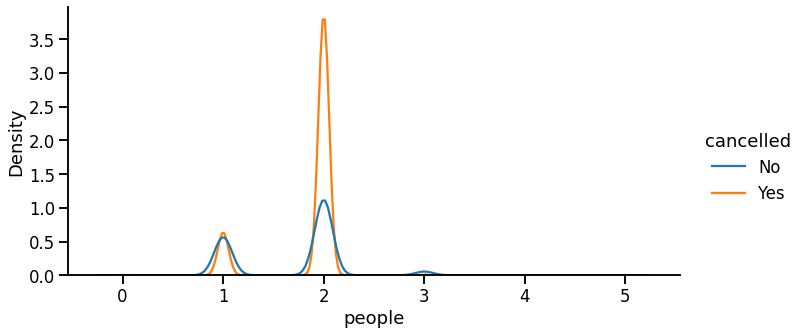

In [34]:
sns.displot(data=group_data, kind='kde', x='people', hue='cancelled', aspect=2);


if there are 2 people in the group they are much more likely to cancel than not. If there is only one person they are slightly more likely to cancel and if there is more than 2 they are likely to not cancel. This shows most group bookings have 2 people. It also shows there aren't any massive groups - potentially I have misunderstood group booking as there was no context about what it meant given when we used this data set in the homework. Groups could work in binary classification but also has a chance of breaking the model.

<a id='model'></a>
# Building models

Before I start making my models, I shall list out what models I am going to make:
* A model using the entire data set
* A model using the city hotel data
* A model using the resort hotel data
* A model using the group data
I will use the features that I found were the most important and had the biggest impact on each of these sets/slices of the data in the exploratory data analysis section.



Starting with the entire data set, I found that lead_time, previous_cancellations, booking_changes and total_special_requests were the most important so I will now create some binary distribution models using these features

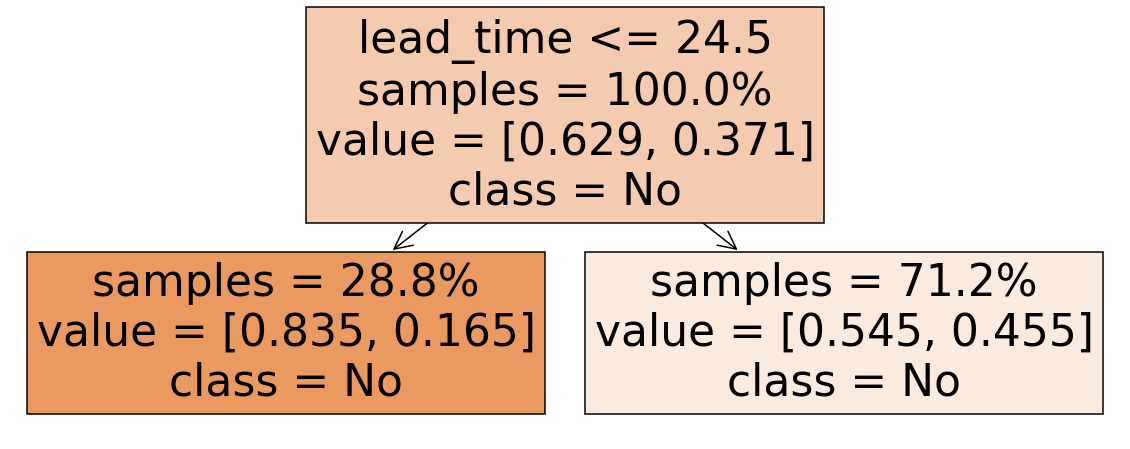

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,15101,15101
1,8777,8777
All,23878,23878


In [35]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['lead_time']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

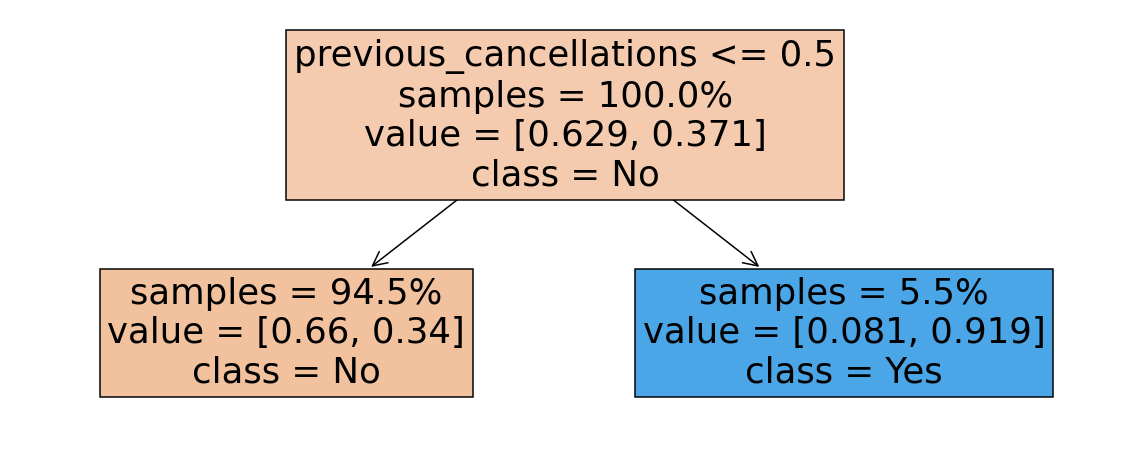

Precision:  90.8 %
Recall:  13.2 %


Predicted,0,1,All
Actual,,,
0,14983,118,15101
1,7619,1158,8777
All,22602,1276,23878


In [36]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

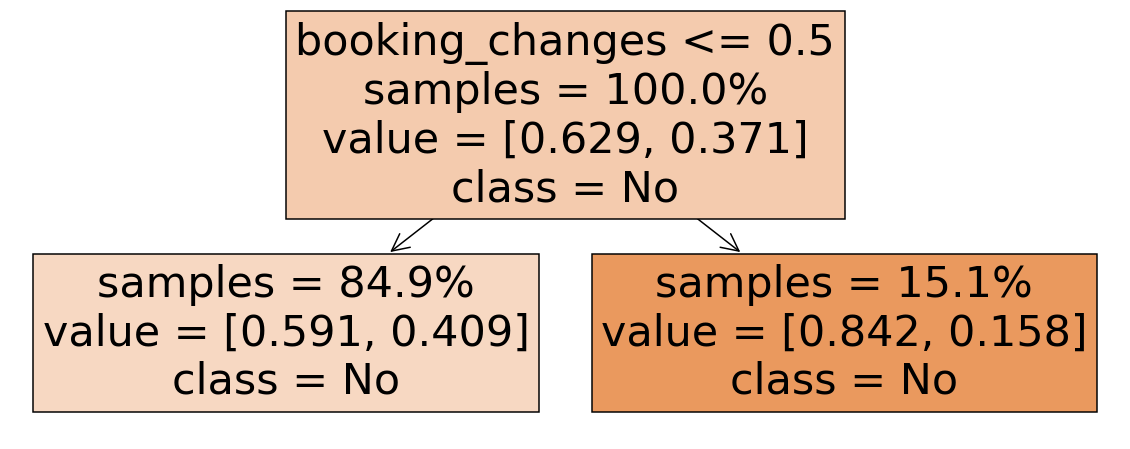

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,15101,15101
1,8777,8777
All,23878,23878


In [37]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['booking_changes']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

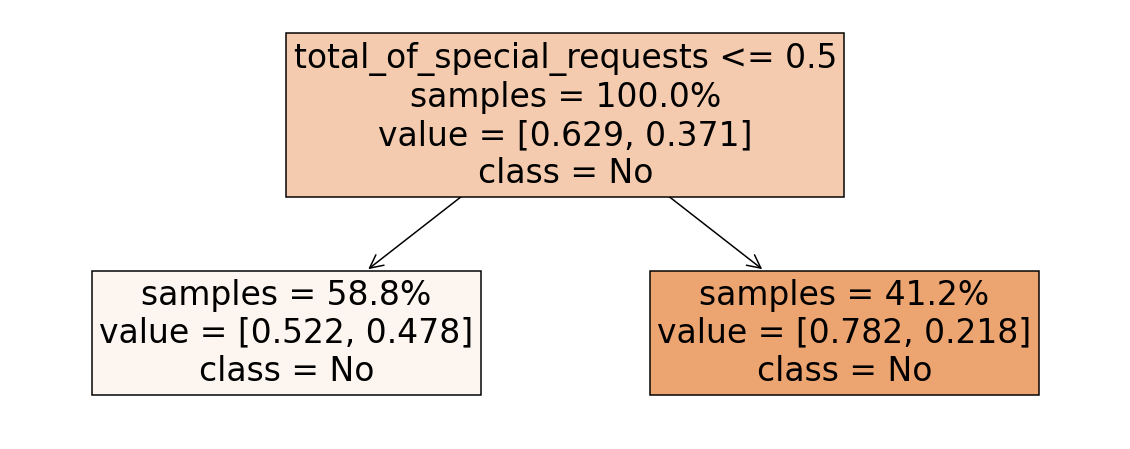

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,15101,15101
1,8777,8777
All,23878,23878


In [38]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Out of these 4 models, the only feature that createsa working model is the previous cancellations feature. The other features don't work because on both sides of 24.5 (for lead time for example) there are more non-cancellations. These models that don't work are biased as they have been underfitted, later I will add more features to try and remove bias created. 

With our working model we have a precision of 90.8 % and a recall of 13.2 %. This means that of the bookings that it predicts will cancel the model is likely to be correct however it still misses a lot of people who do end up cancelling.

To see if I could improve upon this I first tried to make some more one-dimensional models with some other features:

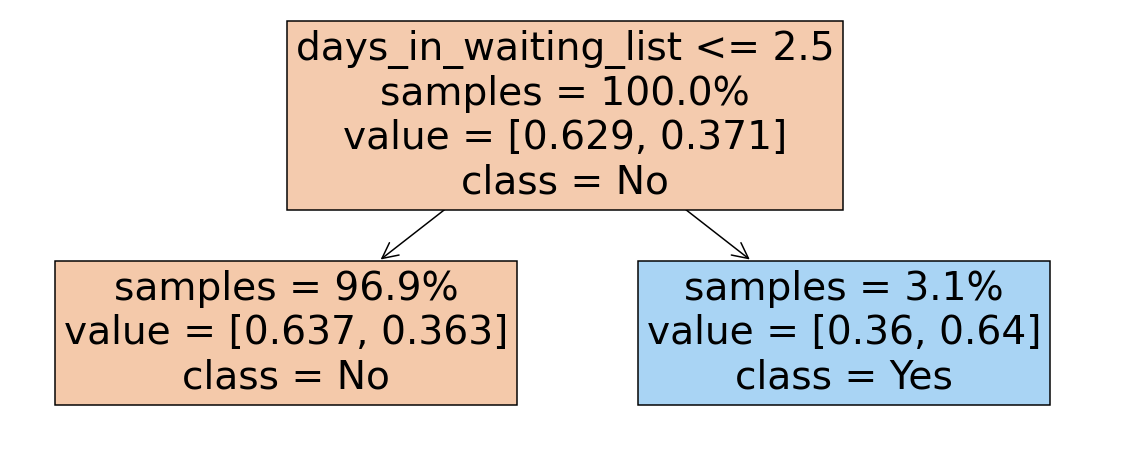

Precision:  64.0 %
Recall:  5.5 %


Predicted,0,1,All
Actual,,,
0,14831,270,15101
1,8297,480,8777
All,23128,750,23878


In [39]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['days_in_waiting_list']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

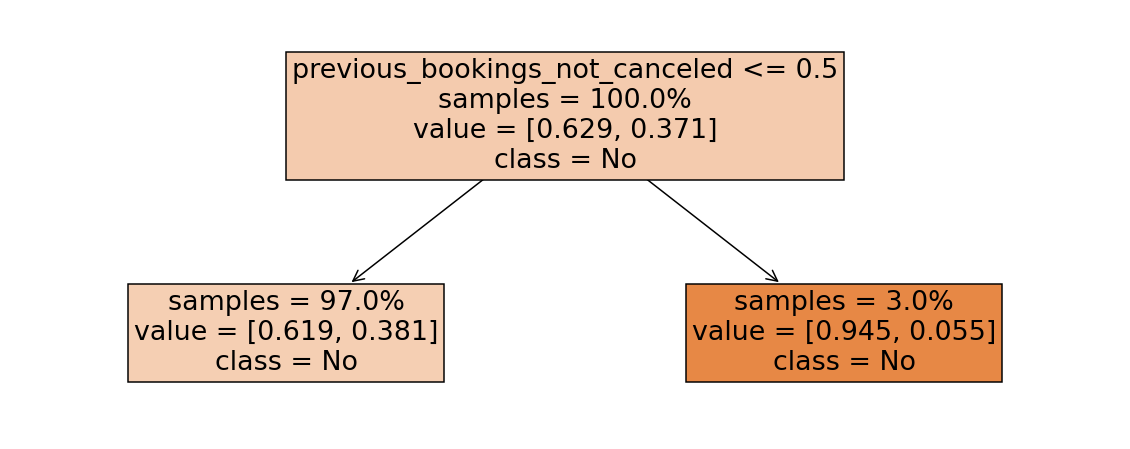

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,15101,15101
1,8777,8777
All,23878,23878


In [40]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_bookings_not_canceled']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

This gave us another feature that creates a working model - days in waiting list. This model has a precision of 64.0% and a recall of 5.5 % which is worse than our other model so it is perhaps not a very reliable feature for predicting cancellations.

To continue our efforts to build a better model and reduce the bias from underfitting lets make models with 2 dimensions.

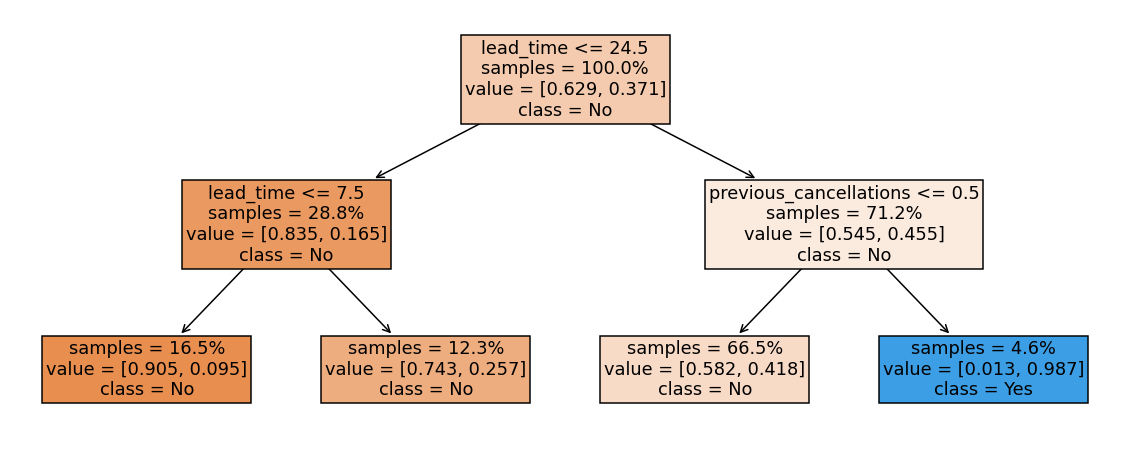

Precision:  98.8 %
Recall:  12.1 %


Predicted,0,1,All
Actual,,,
0,15088,13,15101
1,7717,1060,8777
All,22805,1073,23878


In [41]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations','lead_time']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Here the precision is almost perfect but recall has dropped a little.

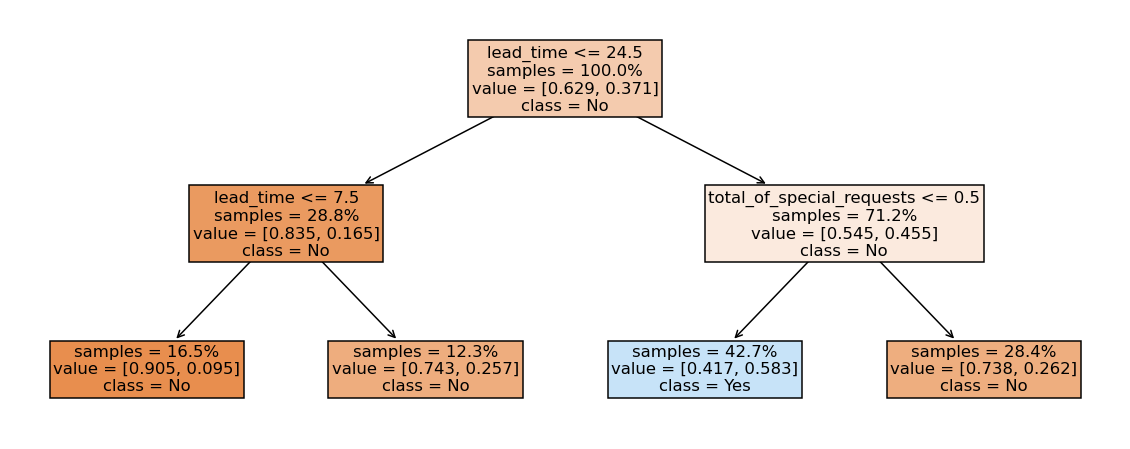

Precision:  57.7 %
Recall:  67.2 %


Predicted,0,1,All
Actual,,,
0,10773,4328,15101
1,2878,5899,8777
All,13651,10227,23878


In [42]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['lead_time','total_of_special_requests']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Sizable drop in precision but also a very big jump in recall. This model is less accurate about those that it does guess but it also identifies alot more bookings that might end up cancelling

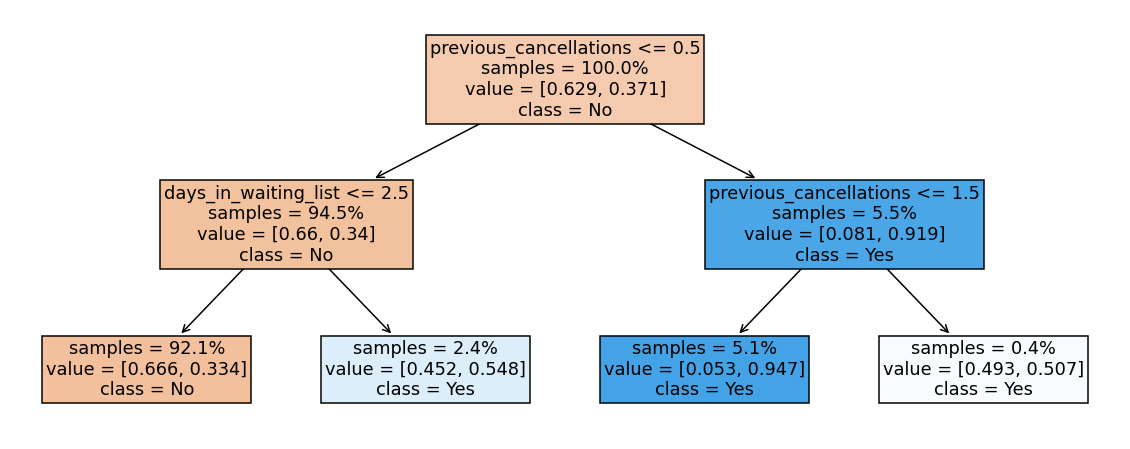

Precision:  79.2 %
Recall:  16.8 %


Predicted,0,1,All
Actual,,,
0,14713,388,15101
1,7299,1478,8777
All,22012,1866,23878


In [43]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations','days_in_waiting_list']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Despite these features being the only ones to make working models the combined model gives sub-par results. Precision is still quite high but it is worse than previous_cancellations on its own and the recall is only slightly better and remains low.

Now I am going to make one more model, but now with one more dimension. The problem with adding dimensions is that even though it can increase quality of a model (and has the chance to decrease) it increases complexity and makes it harder to describe. It could also introduce bias from overfitting which could cause the model to mistake noise for signal and lead to an inaccurate model. 

But here is the 3 dimensional model:

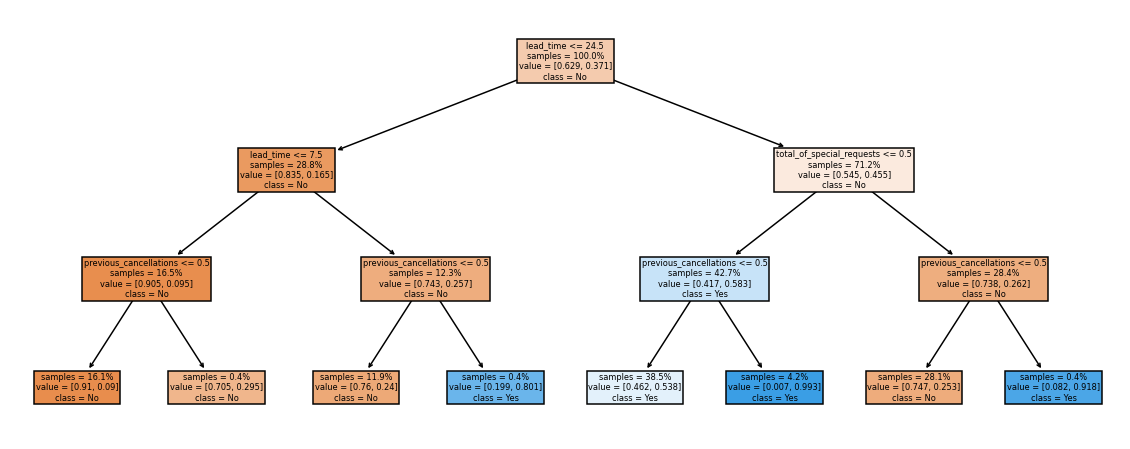

Precision:  58.1 %
Recall:  69.0 %


Predicted,0,1,All
Actual,,,
0,10740,4361,15101
1,2722,6055,8777
All,13462,10416,23878


In [44]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations','lead_time','total_of_special_requests']
X = hotel_data[input_features]
y = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Here I have managed to get slightly better precision and recall however it is only a very minor difference and the 2 dimensional models are probably better as it is much harder to see what is causing the result and they are less likely to be biased. 

Ultimately for the entire data set I think the best model in general is lead time and total of special requests as it boasts a respectable precision and a high recall meaning that it will identify a lot of people who are probable to cancel. It does this also using only 2 features which keeps the model fairly simple. However if the hotel companies wanted to be more sure that the bookings selected were actually going to cancel then the model using lead time and previous cancellations would be more appropirate as this model has near perfect precision however it does lack on the recall front with a recall of 12.1% but if precision is important for what the model is going to be used for then this model would be the way to go.

**NOW FOR THE CITY HOTEL**

This is one of the hotels. From exploratory data analysis, I found that the features that affected this hotel the most were lead time and total of special requests - booking changes and previous cancellations may be useful too

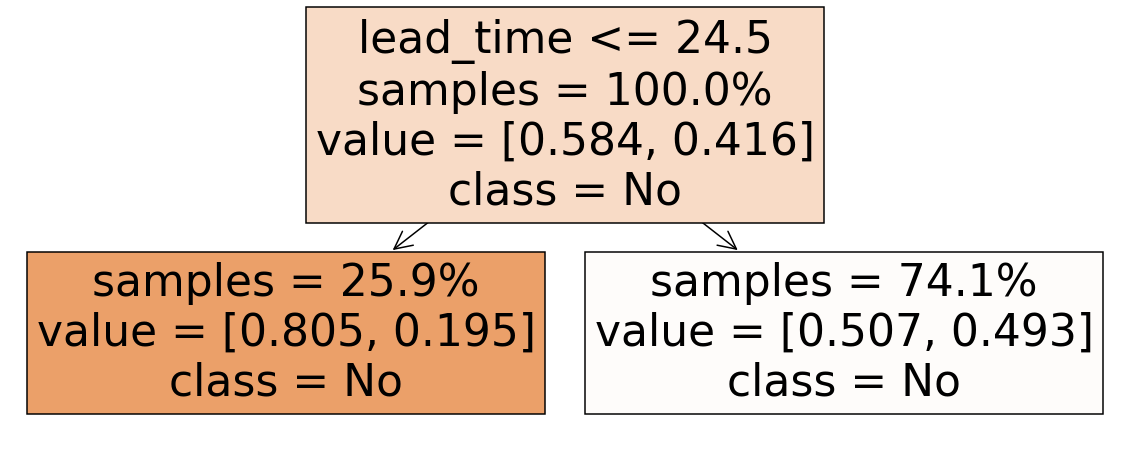

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,9162,9162
1,6704,6704
All,15866,15866


In [45]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['lead_time']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

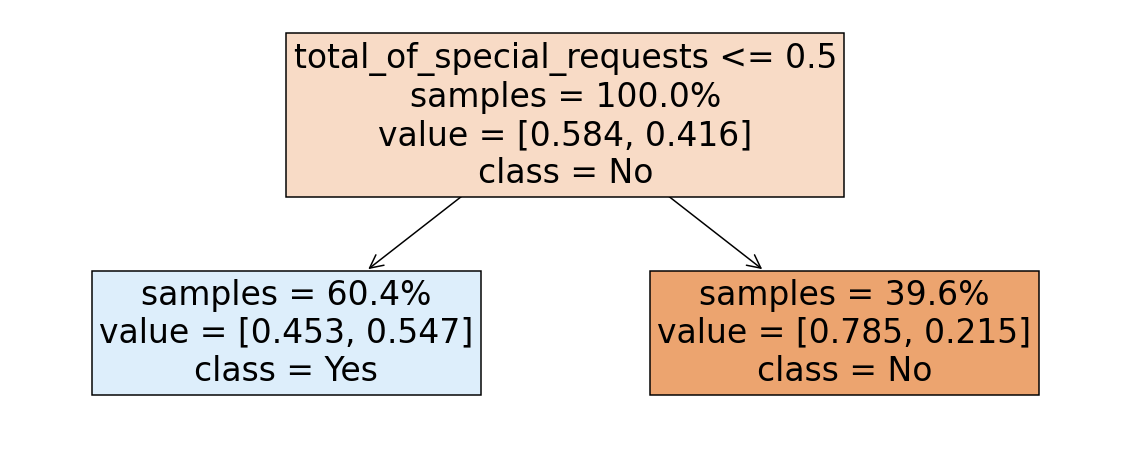

Precision:  55.7 %
Recall:  79.8 %


Predicted,0,1,All
Actual,,,
0,4905,4257,9162
1,1353,5351,6704
All,6258,9608,15866


In [46]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

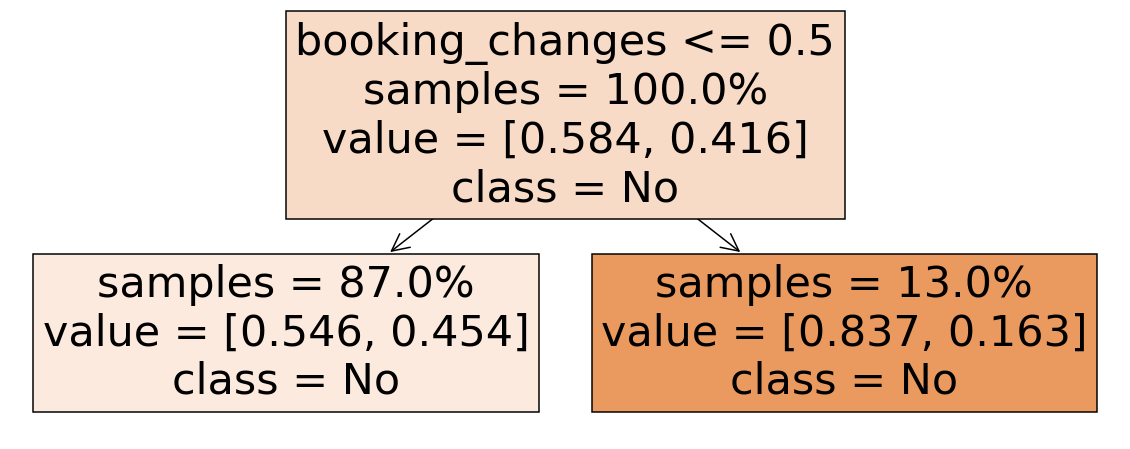

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,9162,9162
1,6704,6704
All,15866,15866


In [47]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['booking_changes']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

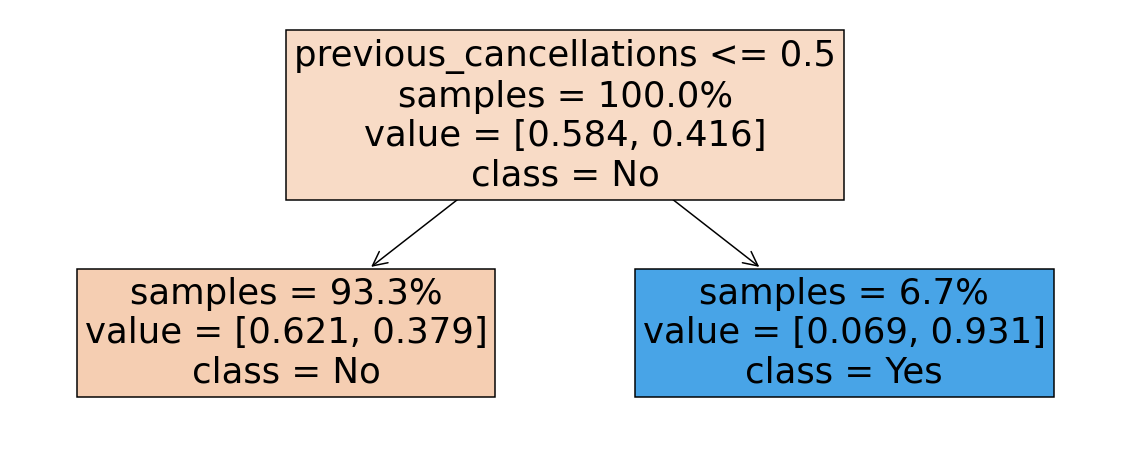

Precision:  93.1 %
Recall:  15.4 %


Predicted,0,1,All
Actual,,,
0,9086,76,9162
1,5674,1030,6704
All,14760,1106,15866


In [48]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Out of these 4 models we have 2 that work and they are both good. The other models have probably been underfitted.

The total of special requests model has a precision of 55.7 % and a massive recall of 79.8 %. This is a really good recall showing that it will catch most of the people that end up cancelling however and this recall is also better than our best model for the entire data set. However having a precision of 55.7% is quite poor as it means only a little more than half of bookings predicted to cancel will actually cancel.

The other model using previous cancellations is quite the opposite with a precision of 93.1% and a recall of 15.4%. This means that of the few bookings that it does guess most of them will cancel. This trend of the previous cancellations reflects what we saw in exploratory data analysis and it also shows similar results as what it did with the entire data set - but now better.

Now to try and make even better models:

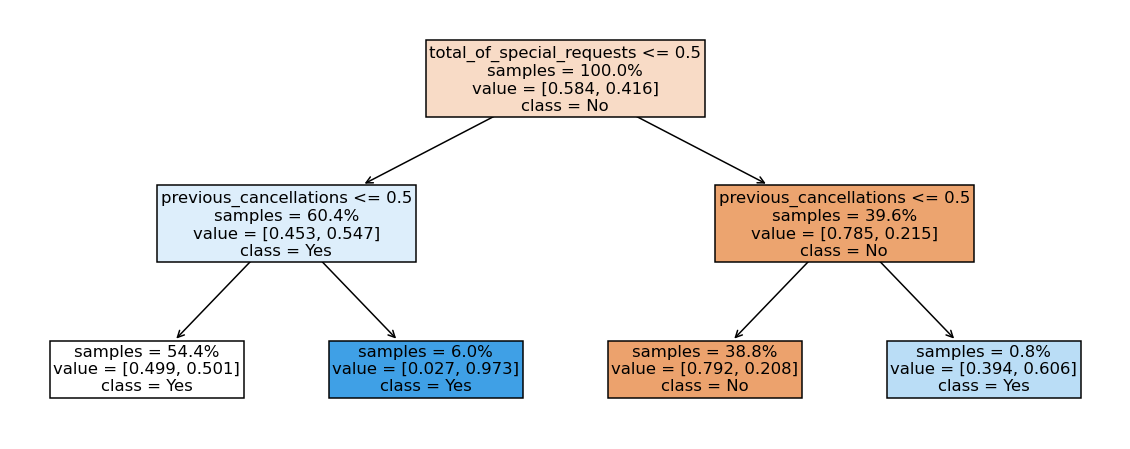

Precision:  55.8 %
Recall:  81.0 %


Predicted,0,1,All
Actual,,,
0,4869,4293,9162
1,1276,5428,6704
All,6145,9721,15866


In [49]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests','previous_cancellations']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

While this model is technically better the margin of improvement is tiny and it also uses 2 features which increases complexity but also may be reducing bias. 

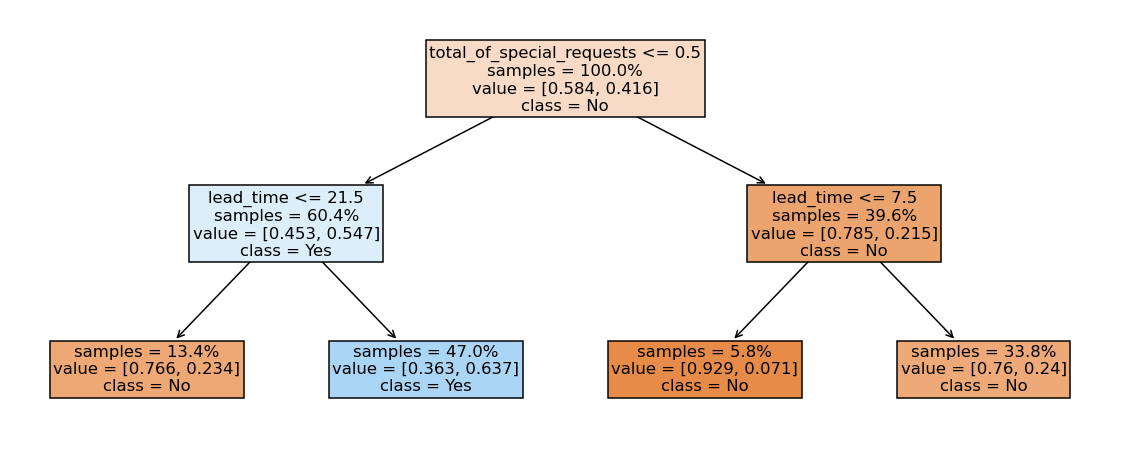

Precision:  64.2 %
Recall:  72.0 %


Predicted,0,1,All
Actual,,,
0,6468,2694,9162
1,1876,4828,6704
All,8344,7522,15866


In [50]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests','lead_time']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

This model offers a nice compromise with a higher precision but a lower (but still very respectable recall).

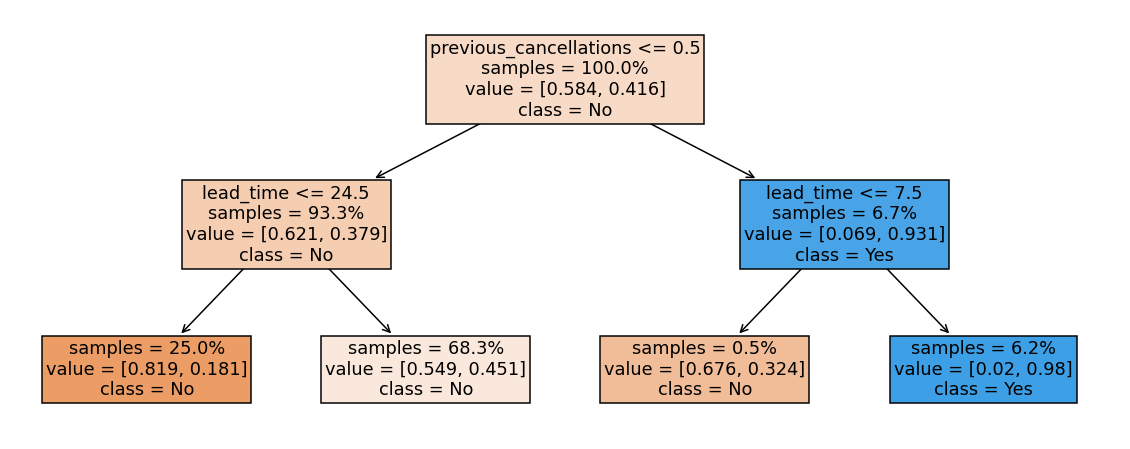

Precision:  97.6 %
Recall:  14.9 %


Predicted,0,1,All
Actual,,,
0,9137,25,9162
1,5702,1002,6704
All,14839,1027,15866


In [51]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['lead_time','previous_cancellations']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Very good precison and slighlty better recall than just previous cancellations

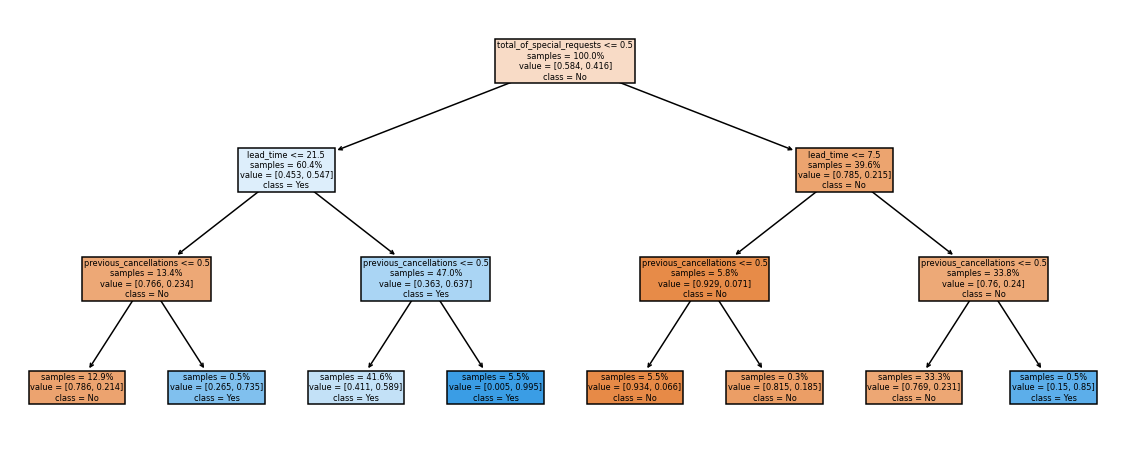

Precision:  64.4 %
Recall:  73.9 %


Predicted,0,1,All
Actual,,,
0,6428,2734,9162
1,1752,4952,6704
All,8180,7686,15866


In [52]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests','previous_cancellations','lead_time']
X = city_data[input_features]
y = city_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Marginal improvement over the total of special requests and lead time model making use of a third dimension appear a little redundant due to the risk of overfitting adding unneccesary bias.

For the city hotel slice the best model was the total of special requests and lead time model as it provided a compromise between precision and recall and ended up with a high precision and recall while only using 2 features. This is the same model that provided great results for the entire data set.

**NOW FOR THE RESORT HOTEL**

This is one of the hotels. From exploratory data analysis, I found that the features that affected this hotel the most were lead time and booking changes - total of special requests and previous cancellations may be useful too however appear to not have as much of a difference between bookings that cancel and those that don't.

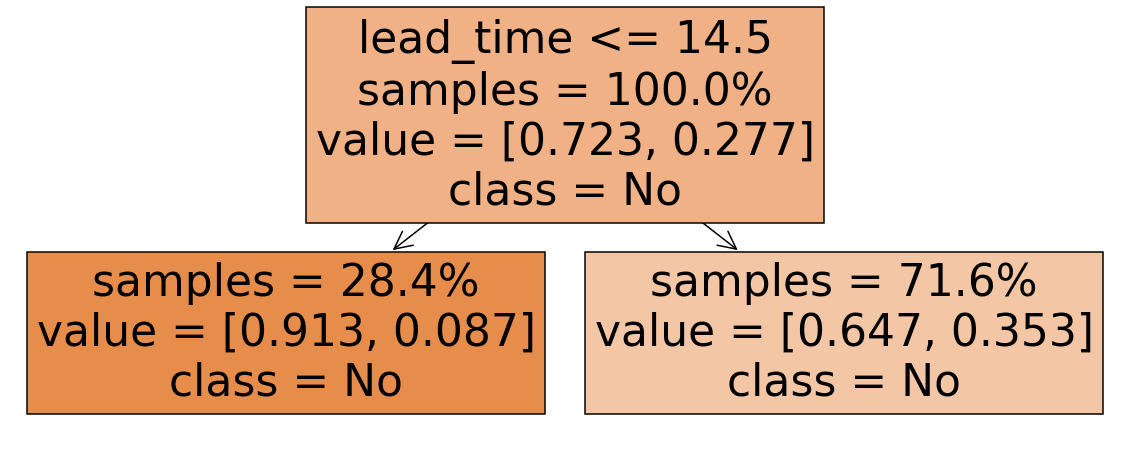

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,5781,5781
1,2231,2231
All,8012,8012


In [53]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['lead_time']
X = resort_data[input_features]
y = resort_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

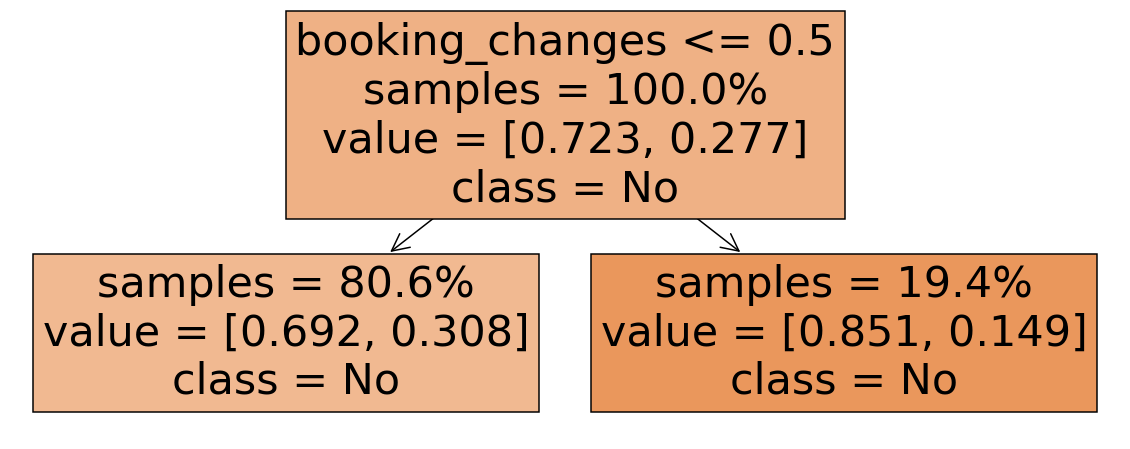

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,5781,5781
1,2231,2231
All,8012,8012


In [54]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['booking_changes']
X = resort_data[input_features]
y = resort_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

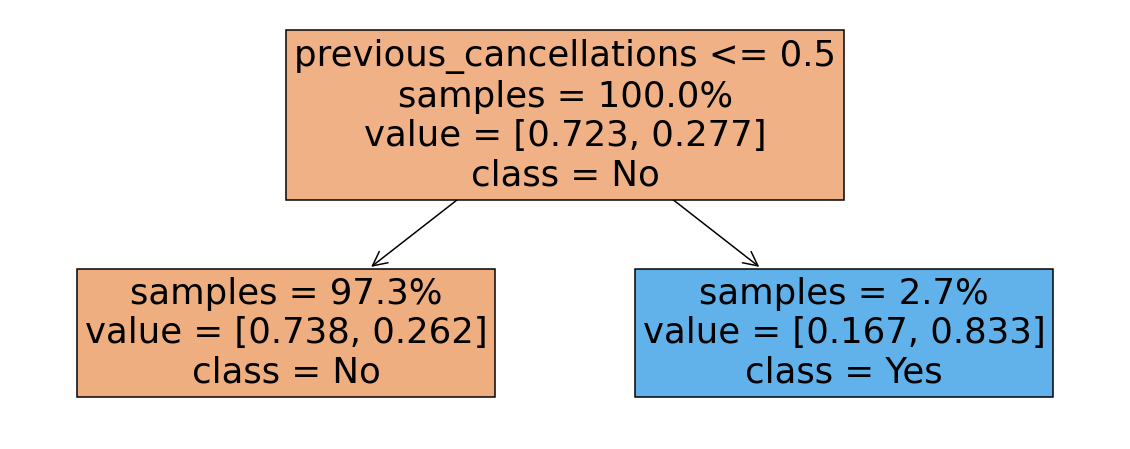

Precision:  88.6 %
Recall:  8.7 %


Predicted,0,1,All
Actual,,,
0,5756,25,5781
1,2037,194,2231
All,7793,219,8012


In [55]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations']
X = resort_data[input_features]
y = resort_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

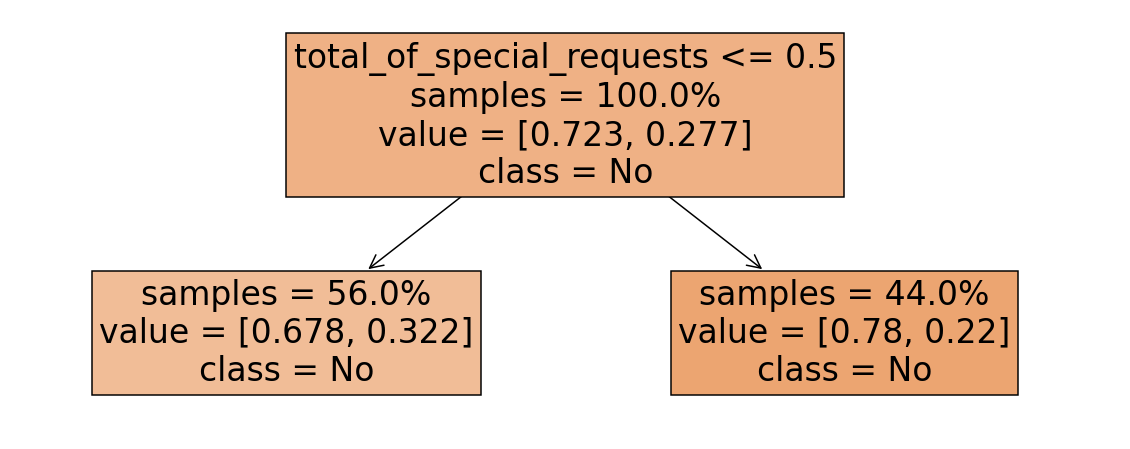

Precision:  0.0 %
Recall:  0.0 %


Predicted,0,All
Actual,,
0,5781,5781
1,2231,2231
All,8012,8012


In [56]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests']
X = resort_data[input_features]
y = resort_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

The previous cancellations model is the only one that works properly. It is similar to the previous cancellations model on the other slices in that it has a high precision and a low recall but here it performs worse. The other 3 models are biased due to underfitting so more features should be added to the model.

Time to try and make a less biased, better model with 2 dimensions now

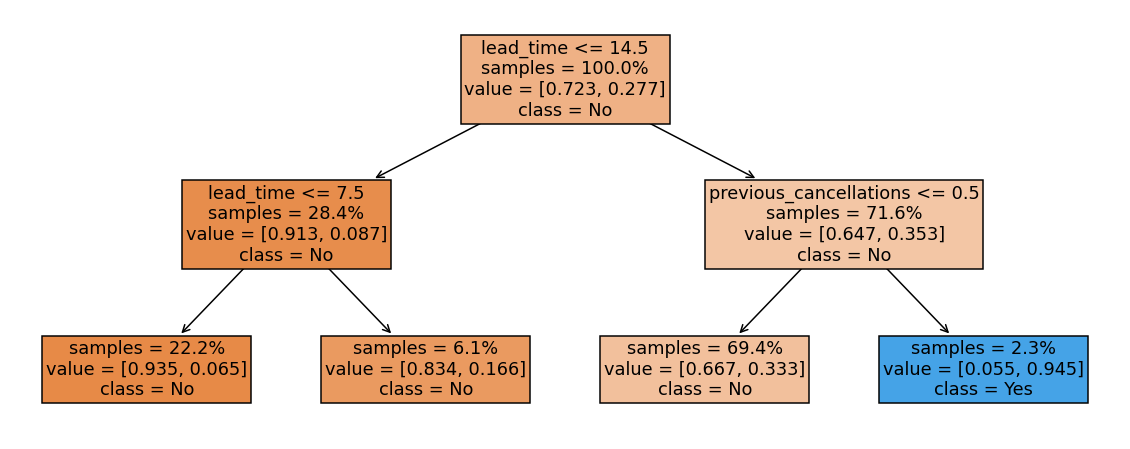

Precision:  96.3 %
Recall:  8.1 %


Predicted,0,1,All
Actual,,,
0,5774,7,5781
1,2051,180,2231
All,7825,187,8012


In [57]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations','lead_time']
X = resort_data[input_features]
y = resort_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

This is the only 2 dimensional model for this slice that I could get to give any decent output that wasn't 0% precision or recall or the exact same as a different 1 dimensional model. Here we have a higher precision and a marginally lower recall.

Ultimately, the resort hotel slice has a lot worse models than the city hotel however we have still got 2 models that appear to give an alright result. The one dimensional previous cancellations model with a high precision but also a really low recall. Then there is the two dimensional previous cancellations and lead time model with an even higher precision but also an even lower recall. The best model for this slice really depends on the situation the model would be used but if I was to choose I would go with the one dimensional model as it is firstly simpler as it is only one dimension, appears to be unbiased, but also it actually indentifies more people who cancel (194 vs 180) .

It is interesting that there is such a difference in the qualities of the models created by the two different hotels. Perhaps the location of the resort hotel being a resort by the beach means that it attracts more families than the city hotel which makes the trends for cancellation less clear and makes models more biased than the city hotel leading to worse models.

**NOW FOR THE GROUP BOOKING**

Out of all the booking types I decided to try to make a model for the group bookings because when doing exploratory data analysis the trends it had seemed to be the most interesting. For example, it was the only group that was more likely to cancel which meant that all the other data looked fairly different too.

From exploratory the data analysis, I found that the features that affected this slice the was lead time. The other factors: days in waiting list, booking changes, total of special requests and previous cancellations may create useful models as well. It would also be interesting to see how effective the number of people in the group is.

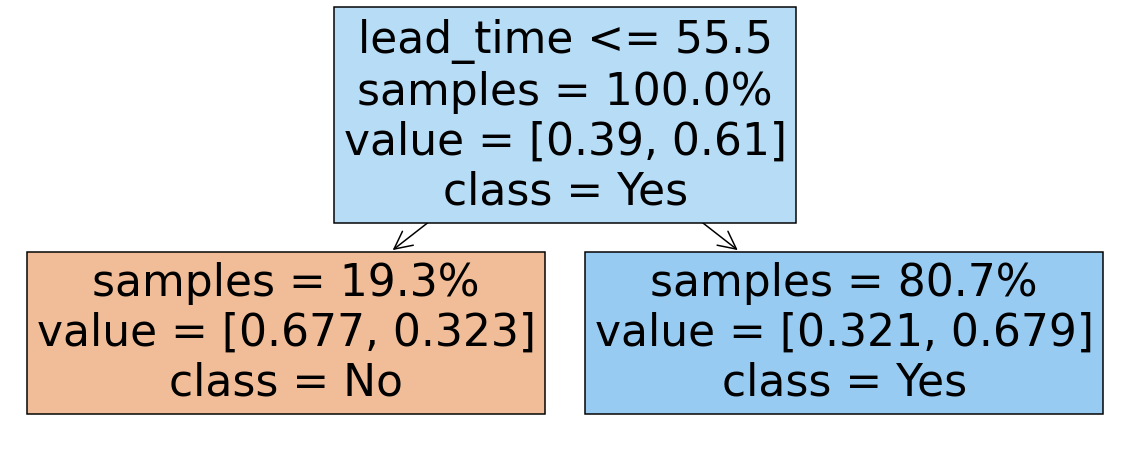

Precision:  68.2 %
Recall:  88.8 %


Predicted,0,1,All
Actual,,,
0,536,1004,1540
1,271,2152,2423
All,807,3156,3963


In [58]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['lead_time']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

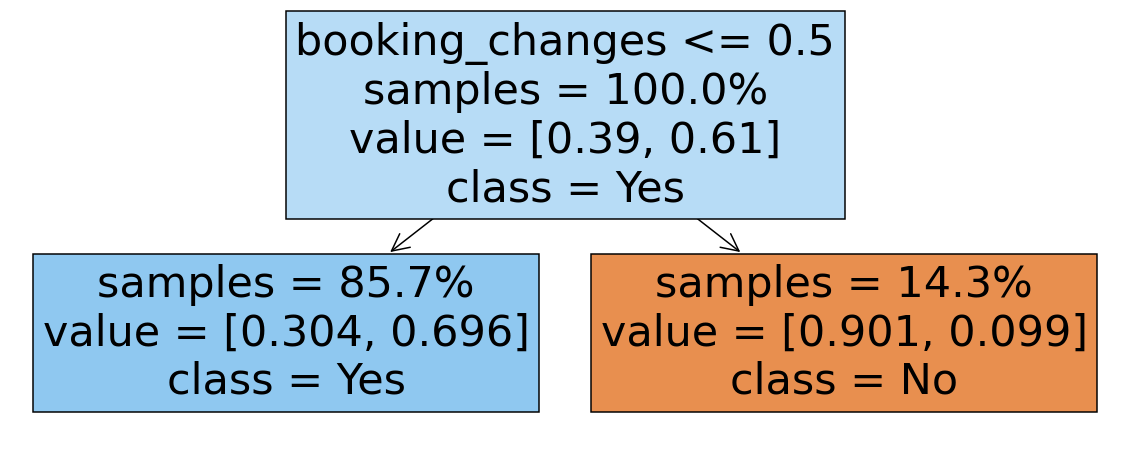

Precision:  70.1 %
Recall:  97.8 %


Predicted,0,1,All
Actual,,,
0,530,1010,1540
1,54,2369,2423
All,584,3379,3963


In [59]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['booking_changes']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

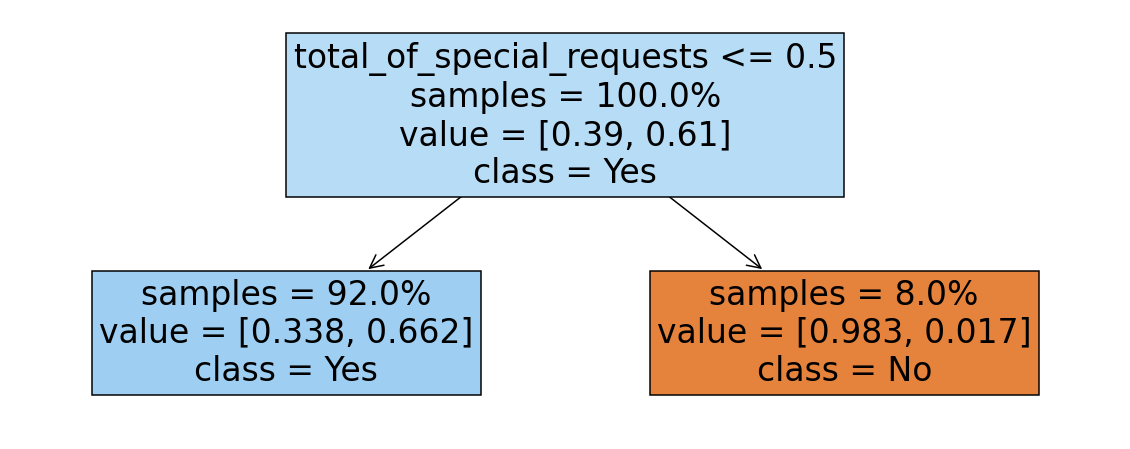

Precision:  66.3 %
Recall:  99.8 %


Predicted,0,1,All
Actual,,,
0,309,1231,1540
1,5,2418,2423
All,314,3649,3963


In [60]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['total_of_special_requests']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

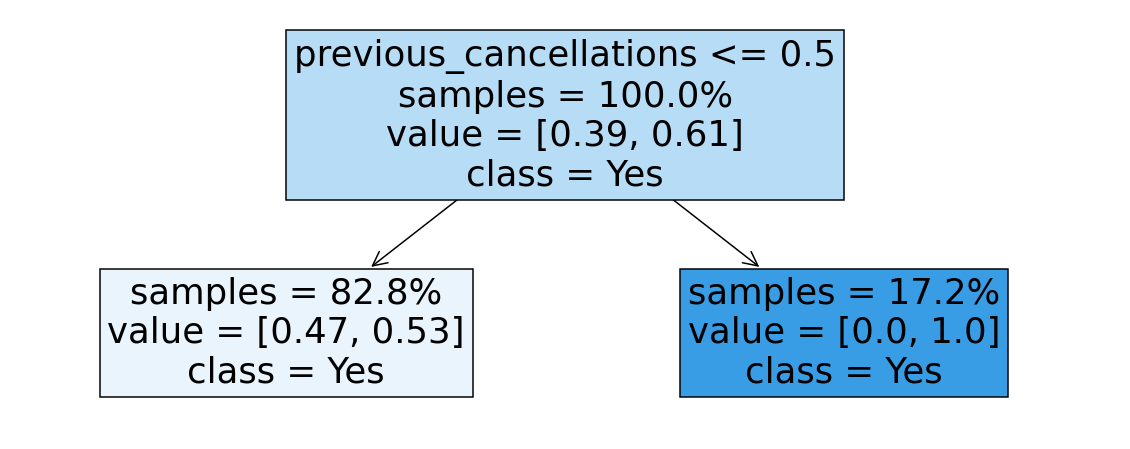

Precision:  61.1 %
Recall:  100.0 %


Predicted,1,All
Actual,,
0,1540,1540
1,2423,2423
All,3963,3963


In [61]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['previous_cancellations']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

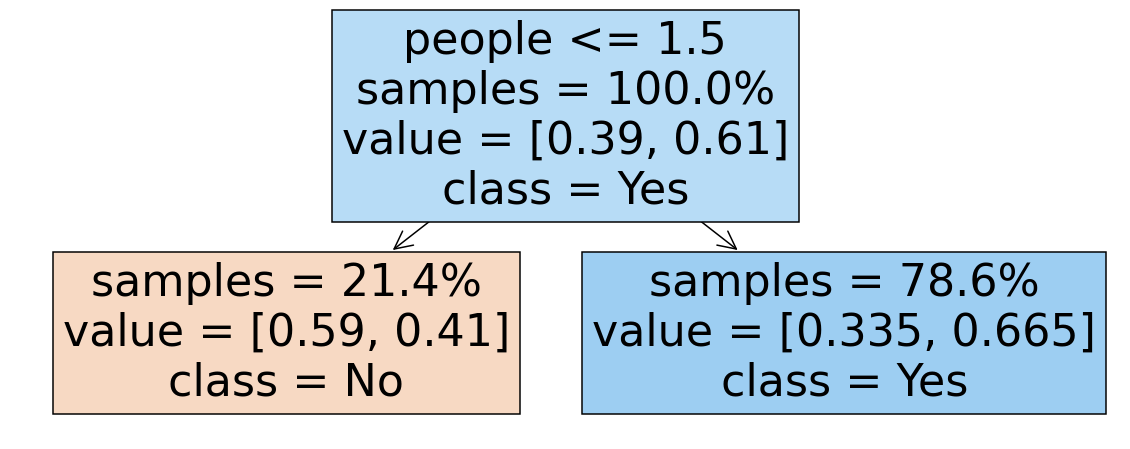

Precision:  67.1 %
Recall:  86.8 %


Predicted,0,1,All
Actual,,,
0,509,1031,1540
1,321,2102,2423
All,830,3133,3963


In [62]:
# Define the input features, X and define the target feature, y, perform the training-testing split
input_features = ['people']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Before comparing models here it is important to note that because there are more yes than no so all our models achieve much higher percentages. This is easiest to see when we achieve 100% recall and still a _decent_ precision of 60% which compared to the models on other slices seems really good however that model is actually biased with underfitting as it just says all bookings are going to cancel meaning it covers all of the bookings that cancel and the 60% precision is just how many of the total group bookings cancel.

With that out of the way the previous cancellations model - the only one that consistently gave results on all other slices doesn't work here.

Due to what I stated above, for this model a high precision is much more important. For this booking changes is the best with a precision of 70.1% and recall of 97.8% which is also extremely high. Lead time also gave a decent model with 68.2% precision and 88.8% recall with similar good traits to booking changes but just worse. Continuing this pattern is the amount of people with a precision of 67.1% and a recall of 86.8%. 

While booking changes is definetly the best one dimensional model for this slice the other models are still very good however maybe slightly biased.

But we can probably do better if we add more features:

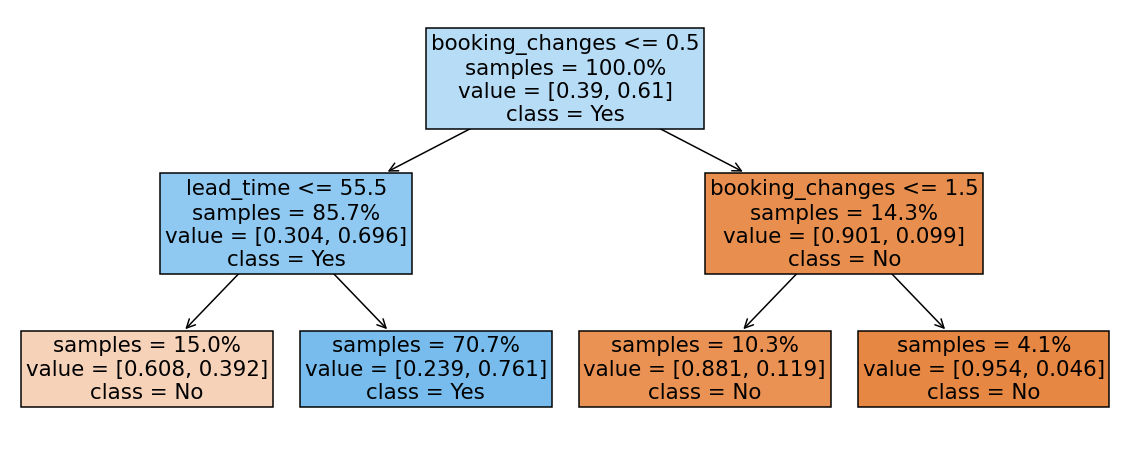

Precision:  77.2 %
Recall:  87.0 %


Predicted,0,1,All
Actual,,,
0,918,622,1540
1,315,2108,2423
All,1233,2730,3963


In [63]:
input_features = ['booking_changes','lead_time']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Best model for this slice so far: highest precision while maintaining a high recall.

note: no other two dimensional models gave satisfactory results.

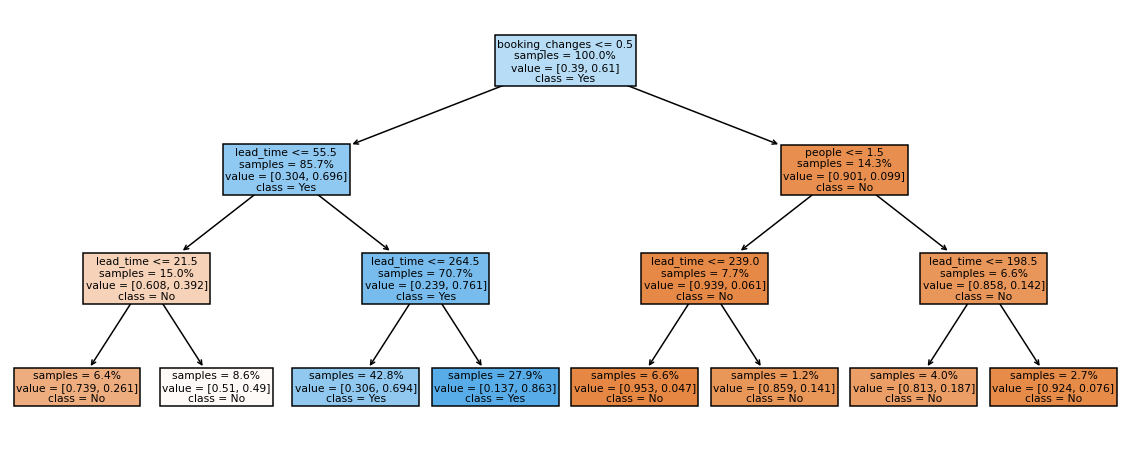

Precision:  77.2 %
Recall:  87.0 %


Predicted,0,1,All
Actual,,,
0,918,622,1540
1,315,2108,2423
All,1233,2730,3963


In [64]:
input_features = ['lead_time','people','booking_changes']
X = group_data[input_features]
y = group_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# create the model and display the decision tree
tree_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plot_decision_tree(tree_model)

# create a list of the predictions and calculate the metrics and confusion matrix
y_pred = tree_model.predict(X_test)
print("Precision: ",round(100*precision_score(y_test, y_pred, zero_division=0),1),"%")
print("Recall: ",round(100*recall_score(y_test, y_pred),1),"%")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Adding a third dimension doesn't change anything - completely redundant and the booking changes and lead time model is the best as with 2 dimensions it is less complex, easier to explain and less biased with overfitting. 

For this data we get an excellent model from lead time and booking changes that has a precision of 77.2% and recall of 87%. This gives us an accurate model that finds most of the bookings that cancel and most of the bookings that it thinks are likely to cancel end up cancelling.

# Conclusions

Before my final conclusions I want to look at the source of the data to find out how valid and reliable this data set is to see how useful the models that I have made actually are.

If we take a look at the source of the data we see that it has been created by 3 academics from University institue of Lisbon created for the purpose of analysis so I think it is safe to assume that this data is reliable and the conclusions we know make are valid.

Now looking back we can certainly identify trends that cause cancellations and create some pretty good models to predict cancellations.

Going back through the features we have we can see what actually affects cancellation. Starting with the features that didn't have any affect we have stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, adr as well as the number of people in the booking (apart from group bookings). As lead_time increased, probability of cancellation also increased likely due to the longer time making it more likely for people's plans to change. If people had previously cancelled they are more likely to cancel again probably because if someone has canceled before they would have had a reason to cancel so are more likely to cancel again as that same reason could happen again. Similarly, previous_bookings_not_canceled shows that if people have not cancelled before they are more reliable so they are less likely to cancel however this feature ended up being not that useful for further analysis or building models. Both booking_changes and total_of_special_requests share the similar relationship that if people change their booking or make a request they are less likely to cancel perhaps because they have put in effort to make their booking ready so they don't want that to go to waste as well as not wanting to cancel after giving the hotel more work to do. Then days_in_waiting_list showed that the longer they were in the waiting list, the more likely they were to cancel (apart from in a couple slices). Those were all quantitative measures but the dataset also includes some catagorical/qualitative features which I looked at to see how they affected
cancellations and how the other features affected cancellation within thge catagories. The city hotel was a little more likely to cancel than the resort hotel. Full board bookings were more likely to be cancelled than the rest of the meal types which all were around the same level. Within market segments the group bookings were the most likely to cancel, followed by TA bookings (online and offline) and then the rest of them. The group booking was interesting in that it was the only catagory where it was more than a 50% chance (60%) for a booking to cancel.

Then looking specifically at how theses relationships changed within the catagories. Across all catagories lead_time remained a feature that showed a clear trend. Between the resort data and the hotel data only resort data was affected by previous bookings. booking_changes and total_of_special_requests were both a much clearer indicator in the city hotel whereas in the resort hotel the relationship between these features and cancellation was alot less clear. These differences may be due to the typical customers that each resort gets, with more families in the resort and more buisness-folk in the city.
I also looked at what affected the relationship within the different booking types. Previous cancellations and booking changes was consistent accross the booking types but the effect was just intensified for the group bookings. Days in waiting list for TA bookings showed the normal relationship seen in the entire data set however for direct bookings and especially group bookings it appeared that longer waiting list meant more likely to stay - however further investigation into the slices showed that this was just likely due to anomolies with a few bookings just having extremely long wait times which skewed the averages.



With my analysis of the data complete I could use it to start creating binary classification models. I created these models on the entire data set and then saw if I could make better models on individual catagories of the data so I created models for each of the hotels and then for the group booking type. I experimented with many models for each data set/slice I was creating a model for and then found the best model with the highest precision and recall, least complex (as this makes it harder to explain) and with the least bias (either from overfitting or underfitting). 

For the entire data set my best model used was lead_time and total_of_special_requests showing that these features (especially combined) was the best predictor of cancellation for the entire data set. For the city hotel, my best model used lead_time and total_of_special_requests also however gave even better results than this model on the entire data set probably because the data is more specific for the city hotel so there is a more clear trend. Also further implies that those 2 variables have the strongest relationship with the probability to . For the resort hotel it seemed there were a lot less clear trend as my best model that used only previous_cancellations was alot worse than in any of the other slices. Perhaps, the difference between the city and the resort and how clear their trends is due to as I said earlier the type of customers they get where in the city their trends are a lot more predictable, families going to resorts can't be predicted. Finally I created models for the group booking data. This slice was very interesting to make models for due to it being more probable for a booking to cancel than not. I managed to created a great model using booking_changes and lead_time. 


Ultimately, I have managed to thoroughly analyze all of the data and gather information about their trends and then put that information into use with binary classification models. There I managed to find that the most significant features for predicting if a booking is going to cancel is lead_time followed by booking_changes and total_of_special_requests.